# 코로나와 관련된 요인들의 상관관계 분석과 시각화

### 패키지 불러오기

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import missingno as msno
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import missingno as msno
from matplotlib import font_manager, rc
from matplotlib import style
from datetime import date, timedelta
import time
import datetime
import calendar

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.font_manager as fm
from pyecharts import Line,Grid,Pie,Bar,Overlap

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\82109\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
7
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [3]:
df_case = pd.read_csv("Case.csv")
df_patientinfo = pd.read_csv("PatientInfo.csv")
df_patientroute = pd.read_csv("PatientRoute.csv")
df_policy = pd.read_csv("Policy.csv")
df_region = pd.read_csv("Region.csv")
df_searchtrend = pd.read_csv("SearchTrend.csv")
df_seoulfloating = pd.read_csv("SeoulFloating.csv")
df_time = pd.read_csv("Time.csv")
df_timeage = pd.read_csv("TimeAge.csv")
df_timegender = pd.read_csv("TimeGender.csv")
df_timeprovince = pd.read_csv("TimeProvince.csv")
df_weather = pd.read_csv("Weather.csv")


### 데이터 확인

In [4]:
df_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [5]:
df_weather.tail()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
25130,50000,Jeollabuk-do,2020-04-19,11.2,8.0,16.1,15.5,2.5,20.0,85.3
25131,51000,Jeollanam-do,2020-04-19,12.0,10.6,13.4,29.1,8.5,90.0,88.4
25132,60000,Gyeongsangbuk-do,2020-04-19,10.2,5.5,15.0,27.4,5.0,70.0,90.8
25133,61000,Gyeongsangnam-do,2020-04-19,11.1,9.6,14.2,30.0,4.5,70.0,82.3
25134,70000,Jeju-do,2020-04-19,13.3,11.0,15.6,19.5,9.5,90.0,85.4


In [6]:
df_timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [7]:
df_timeprovince.tail()

,date,time,province,confirmed,released,deceased
1559,2020-04-20,0,Jeollabuk-do,17,9,0
1560,2020-04-20,0,Jeollanam-do,15,8,0
1561,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51
1562,2020-04-20,0,Gyeongsangnam-do,116,87,0
1563,2020-04-20,0,Jeju-do,13,6,0


### 결측치 확인

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

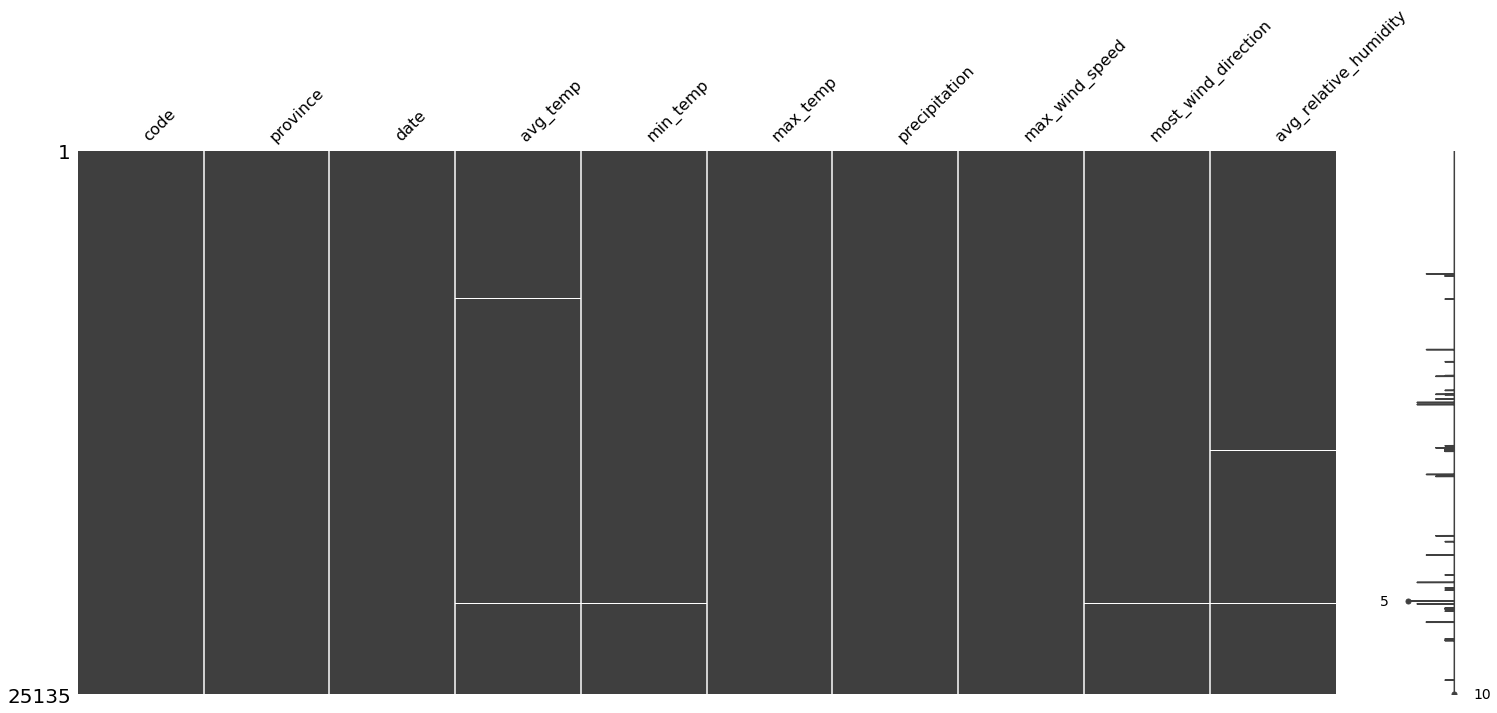

In [8]:
msno.matrix(df_weather)
df_weather.isnull().sum()

In [9]:
df_weather[pd.isnull(df_weather["avg_temp"])]
df_weather[pd.isnull(df_weather["avg_relative_humidity"])]

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
5693,60000,Gyeongsangbuk-do,2016-12-21,NaN,4.2,15.4,10.0,3.3,NaN,NaN
9197,60000,Gyeongsangbuk-do,2017-07-28,NaN,19.2,28.9,14.5,3.9,NaN,NaN
11482,41000,Chungcheongnam-do,2017-12-18,NaN,-5.0,6.8,0.3,5.8,250.0,NaN
11642,41000,Chungcheongnam-do,2017-12-28,NaN,-7.8,NaN,0.0,1.5,NaN,NaN
11737,41000,Chungcheongnam-do,2018-01-03,NaN,NaN,-0.2,0.0,5.1,NaN,NaN
13643,51000,Jeollanam-do,2018-05-02,16.2,11.8,18.7,6.3,14.3,90.0,NaN
13736,40000,Chungcheongbuk-do,2018-05-08,NaN,11.5,20.1,0.0,6.4,90.0,NaN
13820,60000,Gyeongsangbuk-do,2018-05-13,17.6,12.8,25.1,1.5,5.3,180.0,NaN
13836,60000,Gyeongsangbuk-do,2018-05-14,21.9,14.1,29.0,0.0,4.8,180.0,NaN
13852,60000,Gyeongsangbuk-do,2018-05-15,24.4,18.4,30.2,0.0,6.9,180.0,NaN


date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

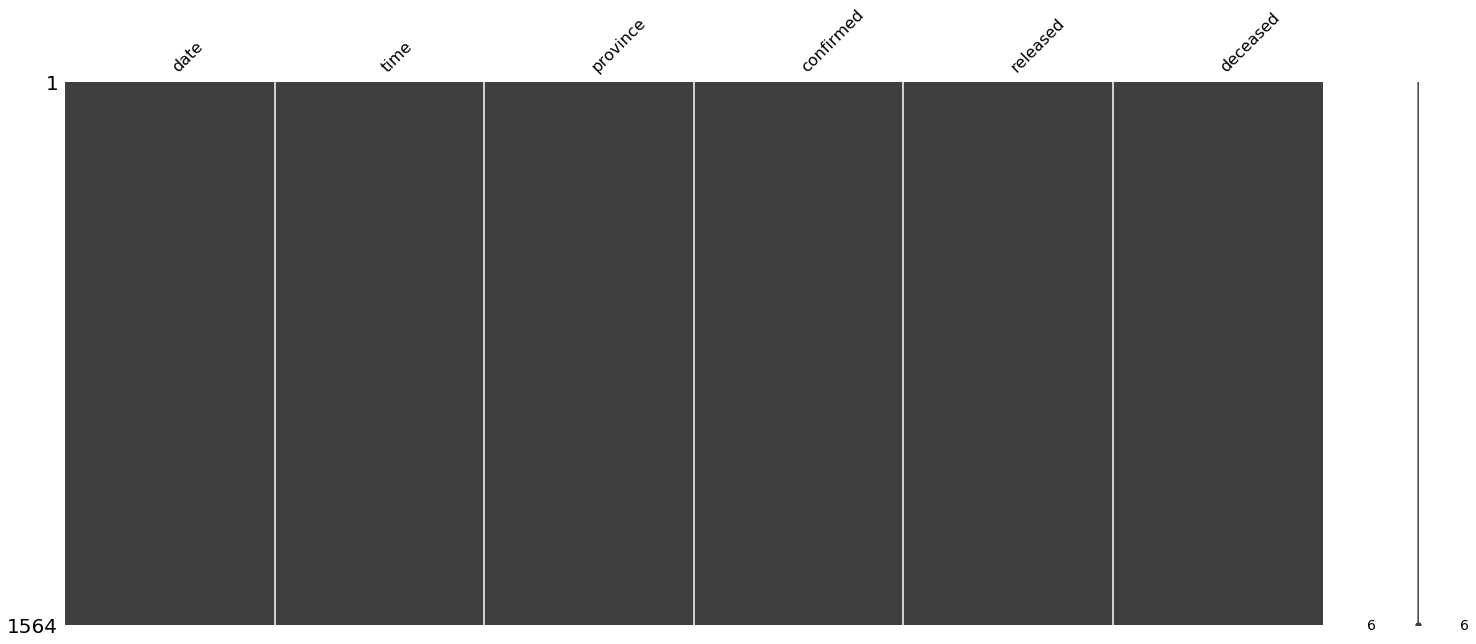

In [10]:
msno.matrix(df_timeprovince)
df_timeprovince.isnull().sum()

### 데이터 전처리

- weather데이터와 timepovince데이터에서 필요한 날짜만 가져오기
- weather: 2016년 1월 1일 ~ 2020년 4월 19일
- timeprovince: 2020년 1월 20일 ~ 2020년 4월 20일

In [11]:
df_wheather_co=df_weather[df_weather["date"]>"2020-01-19"]
df_timeprovince_co=df_timeprovince[df_timeprovince["date"]<"2020-04-20"]

- 각 dataframe에서 필요한 column 추출

In [12]:
df_weather_co=df_wheather_co[["province","date","avg_temp","avg_relative_humidity"]]
del df_timeprovince_co["time"]

- 각 지역별 데이터 개수 확인

In [13]:
df_weather_co.groupby(df_weather_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    70
Chungcheongnam-do    91
Chunghceongbuk-do    21
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Seoul                91
Ulsan                91
dtype: int64

- Chung"hc"eongbuk-do 오타 수정

In [14]:
df_weather_co.loc[df_weather_co["province"]=="Chunghceongbuk-do","province"]="Chungcheongbuk-do"

- 오타 수정 확인

In [15]:
df_weather_co.groupby(df_weather_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    91
Chungcheongnam-do    91
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Seoul                91
Ulsan                91
dtype: int64

- DataFrame의 데이터 개수 확인

In [16]:
len(df_weather_co),len(df_timeprovince_co)

(1456, 1547)

- timeprovince에 지역이 한 곳 더 있는것으로 보임

In [17]:
df_timeprovince_co.groupby(df_timeprovince_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    91
Chungcheongnam-do    91
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Sejong               91
Seoul                91
Ulsan                91
dtype: int64

- weather에는 없는 지역 확인

In [18]:
set(pd.unique(df_timeprovince_co.province))-set(pd.unique(df_weather_co.province))

{'Sejong'}

- 세종 지역 제외

In [19]:
df_timeprovince_co=df_timeprovince_co.loc[df_timeprovince_co["province"]!="Sejong",:]

- 두 데이터의 개수 확인

In [20]:
len(df_weather_co),len(df_timeprovince_co)

(1456, 1456)

- weather와 timeprovince 두 데이터 프레임 병합

In [21]:
corona=pd.merge(left=df_timeprovince_co,right=df_weather_co,how='left',on=["province","date"])
corona.tail(20)

,date,province,confirmed,released,deceased,avg_temp,avg_relative_humidity
1436,2020-04-18,Jeollanam-do,15,7,0,13.7,72.6
1437,2020-04-18,Gyeongsangbuk-do,1358,1046,51,11.4,80.3
1438,2020-04-18,Gyeongsangnam-do,116,84,0,13.7,65.3
1439,2020-04-18,Jeju-do,13,6,0,12.9,74.5
1440,2020-04-19,Seoul,624,288,2,12.3,75.8
1441,2020-04-19,Busan,130,115,3,11.8,84.5
1442,2020-04-19,Daegu,6832,5743,161,11.1,91.9
1443,2020-04-19,Incheon,91,55,0,11.9,77.8
1444,2020-04-19,Gwangju,30,22,0,11.5,89.6
1445,2020-04-19,Daejeon,39,25,0,11.3,85.1


- 날짜 형식 '년-월-일' 에서 '년/월' 로 변경

In [22]:
corona["date"]=pd.to_datetime(corona["date"],format="%Y-%m-%d")
corona["date"]=corona["date"].dt.strftime("%m/%d")

- 누적으로 되어있는 확진자 수 
- 상위 4개 지역에 대하여 일 별 확진자수 구하기

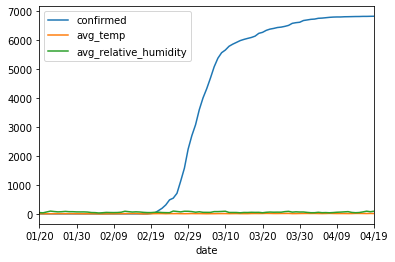

In [23]:
corona.loc[corona.province=="Daegu",["date","confirmed","avg_temp","avg_relative_humidity"]].plot(x="date")

In [24]:
corona[corona["date"]=="04/19"].sort_values("confirmed",ascending=False).head(4)

,date,province,confirmed,released,deceased,avg_temp,avg_relative_humidity
1442,04/19,Daegu,6832,5743,161,11.1,91.9
1453,04/19,Gyeongsangbuk-do,1359,1057,51,10.2,90.8
1447,04/19,Gyeonggi-do,654,370,14,11.8,90.1
1440,04/19,Seoul,624,288,2,12.3,75.8


In [25]:
list(corona[corona["date"]=="04/19"].sort_values("confirmed",ascending=False)["province"][0:4].values)

['Daegu', 'Gyeongsangbuk-do', 'Gyeonggi-do', 'Seoul']

In [26]:
Daegu=corona[corona["province"]=="Daegu"]
Gyeongsangbuk=corona[corona["province"]=="Gyeongsangbuk-do"]
Gyeonggi=corona[corona["province"]=="Gyeonggi-do"]
Seoul=corona[corona["province"]=="Seoul"]

In [27]:
def day(df):
    df.reset_index(drop=True,inplace=True)
    l=list()
    for i in df.index:
        if i==0:
            l.append(df["confirmed"].iloc[i])
        else:
            l.append(df["confirmed"].iloc[i]-df["confirmed"].iloc[i-1])
    df["day_confirmed"]=l

In [28]:
day(Daegu)
day(Gyeongsangbuk)
day(Gyeonggi)
day(Seoul)

### 시각화
- 확진자 수 상위 4개 지역에 대하여 날짜별 확진자, 기온, 습도 시각화

In [29]:
def co_plot(df,v,num=700):
    fig,ax1=plt.subplots(figsize=(15,10))
    ax2=ax1.twinx()

    line1=ax1.bar(df.date,df["day_confirmed"],color="skyblue")
    line2=ax2.plot(df.date,df[v],color="r")

    ax1.set_ylabel("Number",fontsize=15)
    ax1.set_ylim(0,num)
    ax1.set_xlim(-10,95)
    if v=="avg_temp":
        ax2.set_ylim(-15,35)
        ax2.set_ylabel("avg_temp",fontsize=15)
    else:
        ax2.set_ylim(0,130)
        ax2.set_ylabel("avg_relative_humidity",fontsize=15)
    ax1.set_xticks(np.arange(0,91,30))
    plt.title(df.iloc[0,1],fontsize=20)
    plt.grid(False)
    plt.show()

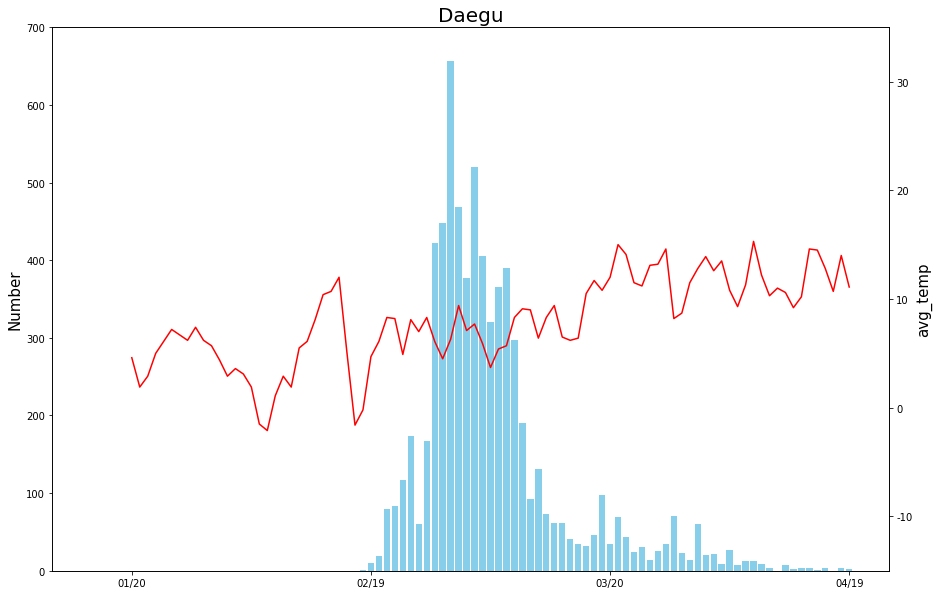

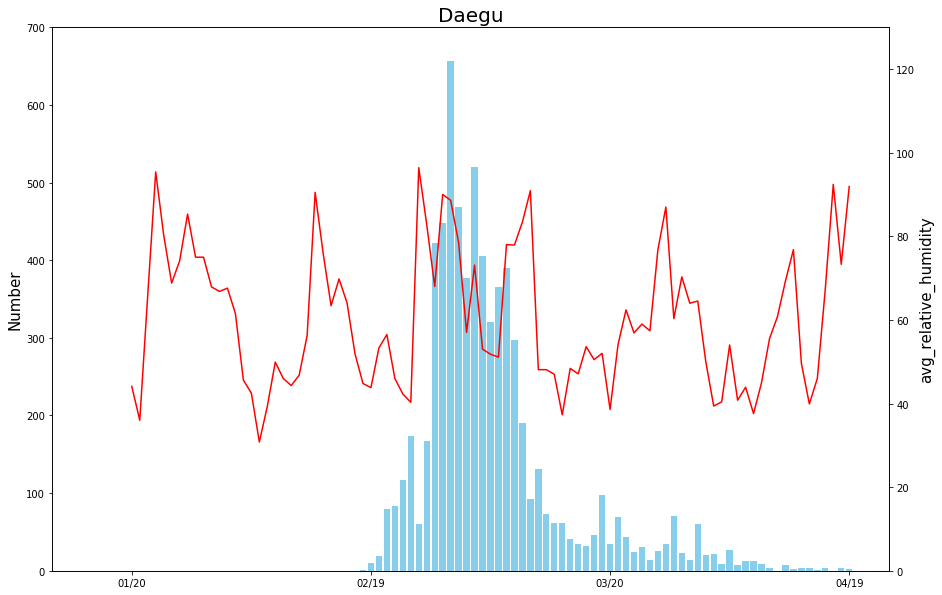

In [30]:
# Daegu
co_plot(Daegu,"avg_temp")
co_plot(Daegu,"avg_relative_humidity")

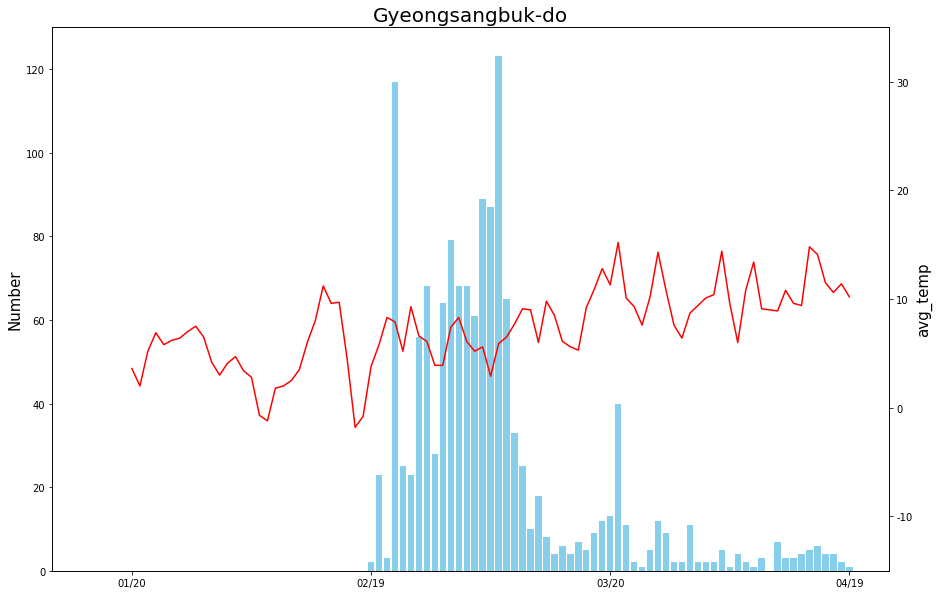

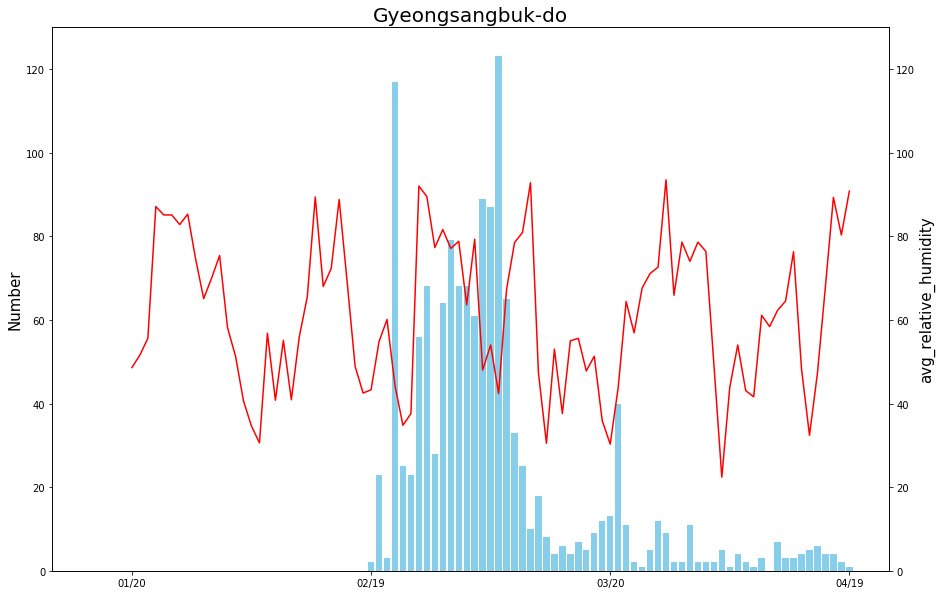

In [31]:
# Gyeongsangbuk
co_plot(Gyeongsangbuk,"avg_temp",130)
co_plot(Gyeongsangbuk,"avg_relative_humidity",130)

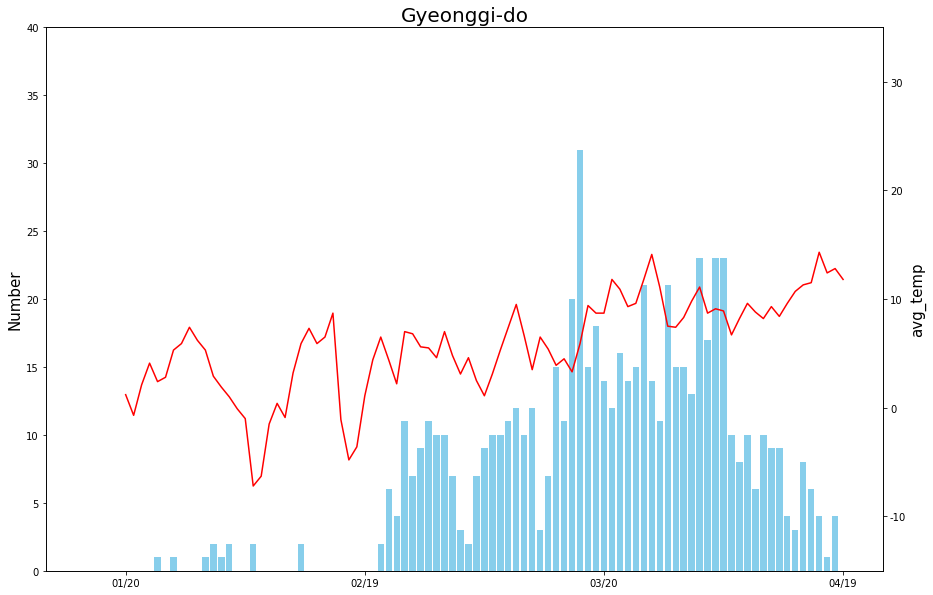

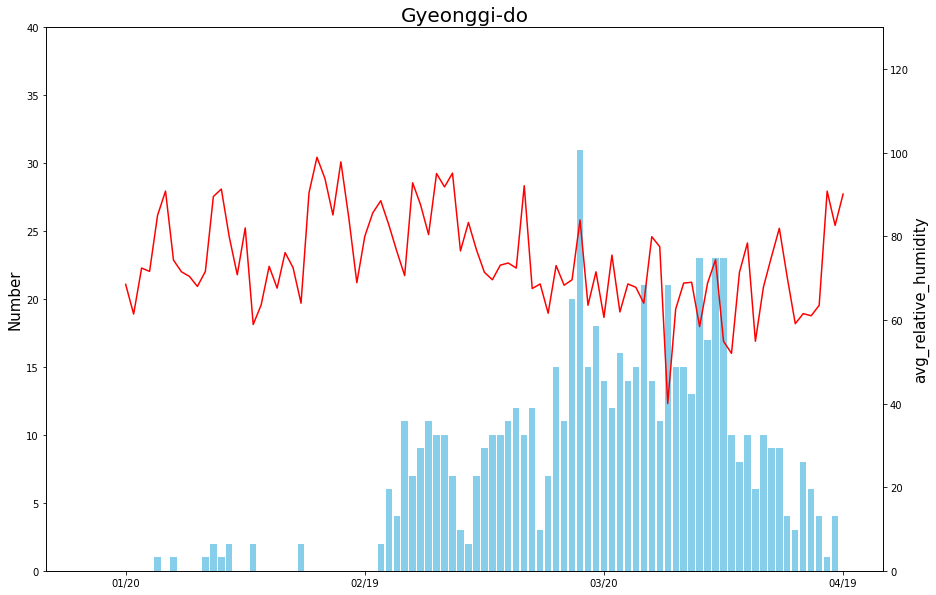

In [32]:
# Gyeonggi
co_plot(Gyeonggi,"avg_temp",40)
co_plot(Gyeonggi,"avg_relative_humidity",40)

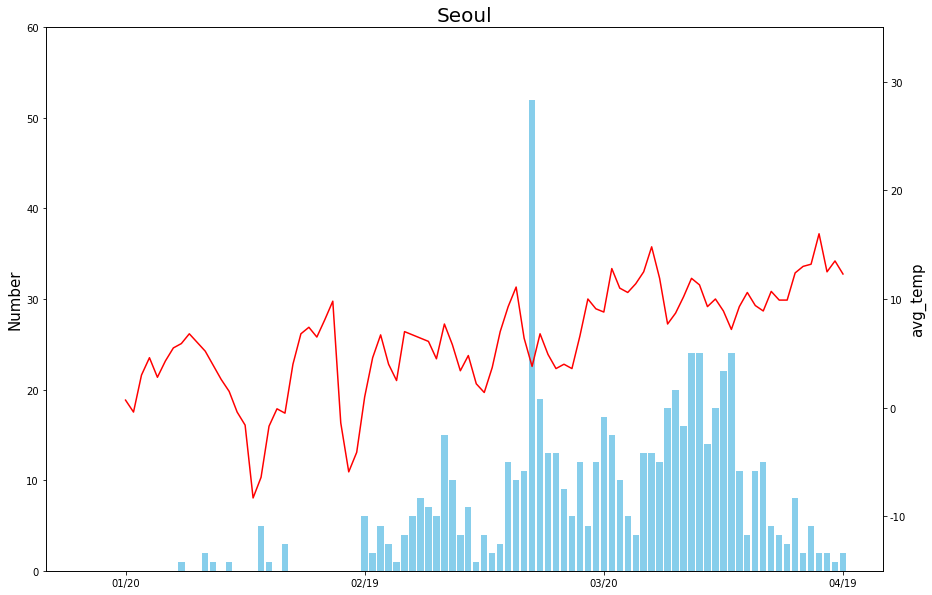

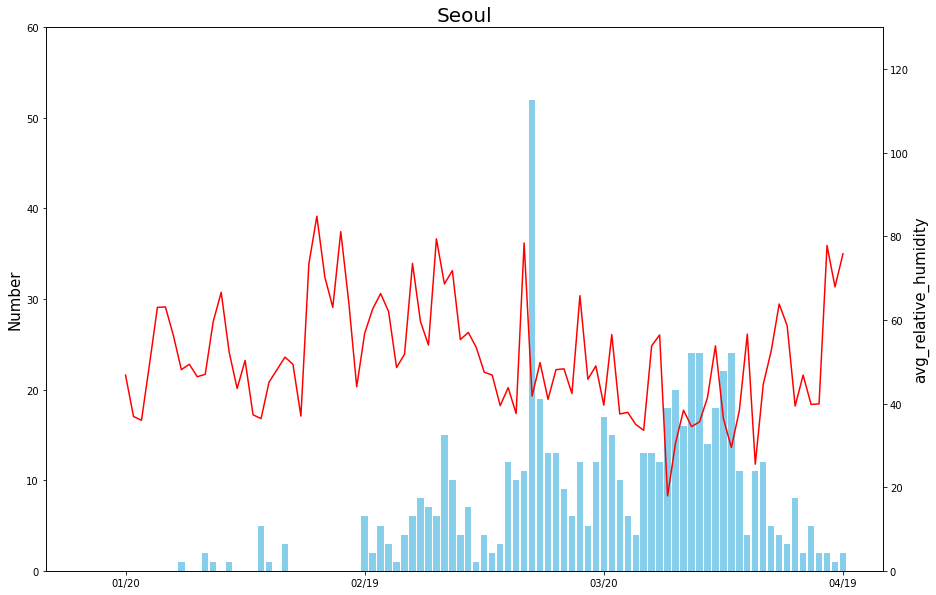

In [33]:
# Seoul
co_plot(Seoul,"avg_temp",60)
co_plot(Seoul,"avg_relative_humidity",60)

#### 데이터 확인

In [34]:
df_time.tail(5)

,date,time,test,negative,confirmed,released,deceased
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234
91,2020-04-20,0,563035,540380,10674,8114,236


In [35]:
df_policy.tail(5)

,policy_id,country,type,gov_policy,detail,start_date,end_date
39,40,Korea,Education,School Opening with Online Class,middle school (1st ~ 2nd grade),2020-04-16,NaN
40,41,Korea,Education,School Opening with Online Class,elementary school (4th ~ 6th grade),2020-04-16,NaN
41,42,Korea,Education,School Opening with Online Class,elementary school (1st ~ 3rd grade),2020-04-20,NaN
42,43,Korea,Technology,Open Data,Patients Information,2020-01-20,NaN
43,44,Korea,Technology,Open API,Public Mask Sales Information,2020-03-08,NaN


#### 결측치 확인

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

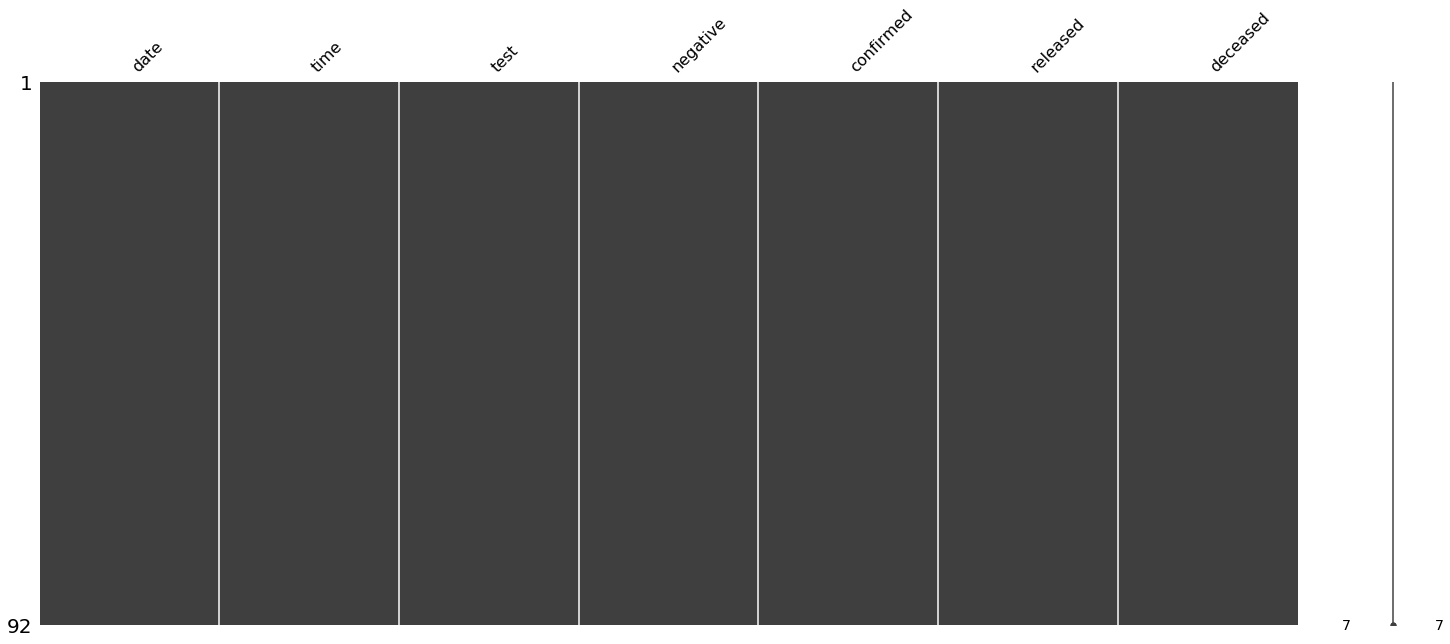

In [36]:

msno.matrix(df_time)
df_time.isnull().sum()

#### 전체적인 경향을 보기위해 누적 그래프 확인

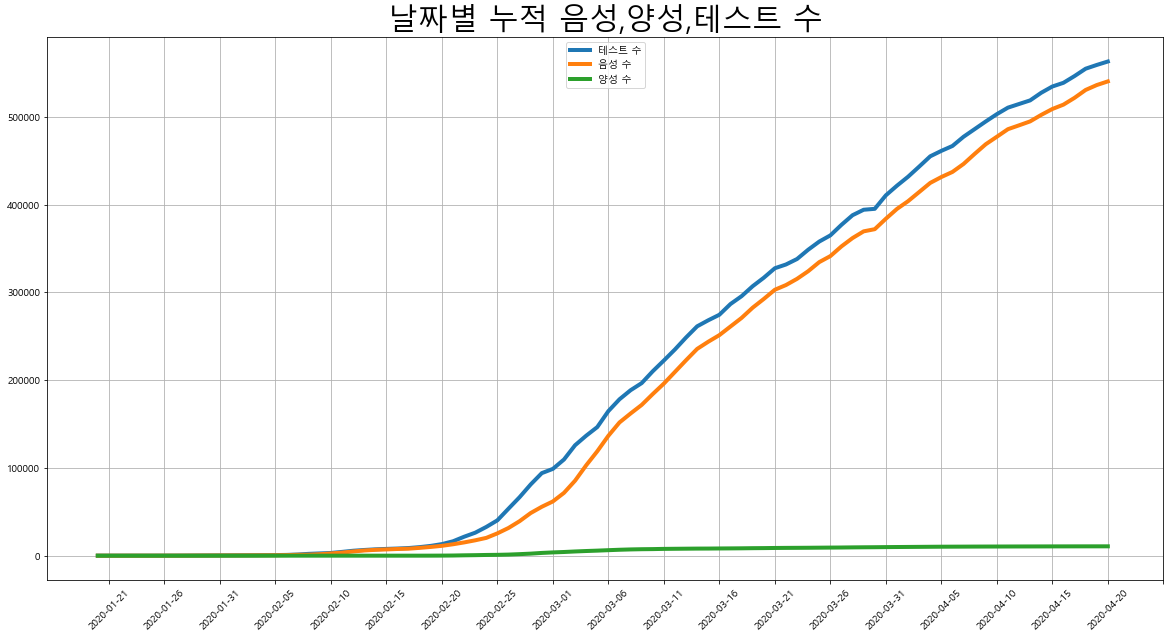

In [37]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(20, 10))

plt.plot(df_time.date, df_time.test,
         linewidth=4, label='테스트 수')

plt.plot(df_time.date, df_time.negative,
         linewidth=4, label='음성 수')

plt.plot(df_time.date, df_time.confirmed,
         linewidth=4, label='양성 수')
plt.xticks(np.arange(1, 100, 5), rotation=45)
plt.title('날짜별 누적 음성,양성,테스트 수',fontsize=30)

plt.legend(loc=9)
plt.grid()

### 

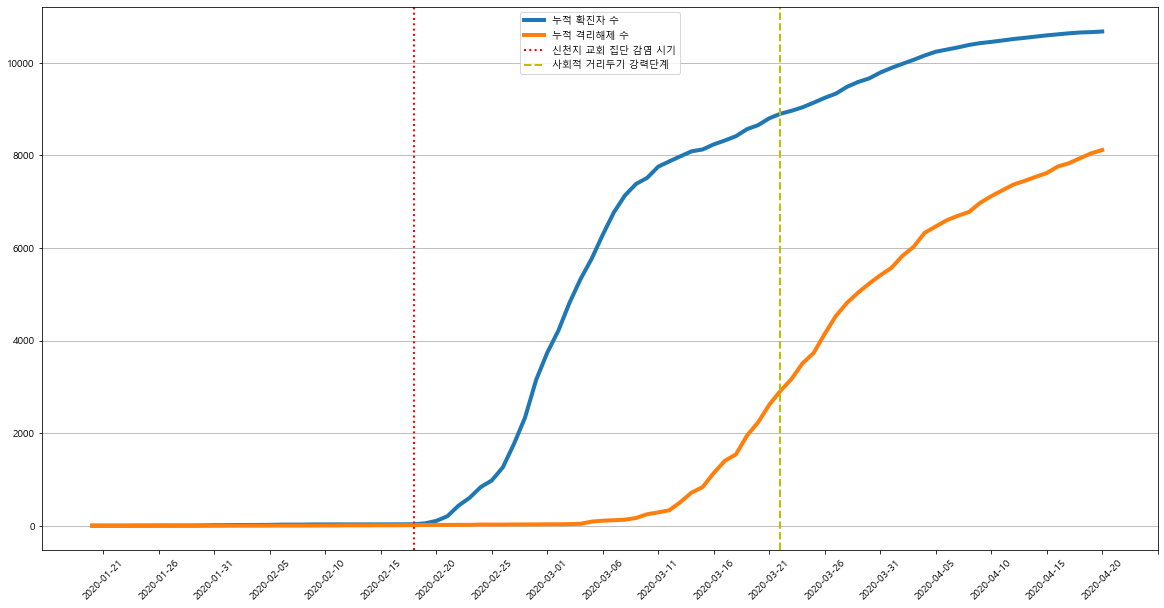

In [38]:
plt.figure(figsize=(20, 10))


plt.plot(df_time.date, df_time.confirmed,
         linewidth=4, label='누적 확진자 수',)

plt.plot(df_time.date, df_time.released,
         linewidth=4, label='누적 격리해제 수')


plt.xticks(np.arange(1, 100, 5), rotation=45)


plt.axvline(x='2020-02-18', ls=':', c='r',
            linewidth=2, label='신천지 교회 집단 감염 시기')
plt.axvline(x='2020-03-22', ls="--", c="y", linewidth=2,
            label='사회적 거리두기 강력단계')


plt.legend(loc=9)
plt.grid(axis='y')
plt.show()

#### 사망자 수는 상대적으로 작은 수이므로 이 그래프에서 표현하기 어려움

#### 날짜데이터 확인

In [39]:
df_time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [40]:
df_timeage

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
445,2020-04-20,0,40s,1412,3
446,2020-04-20,0,50s,1948,15
447,2020-04-20,0,60s,1343,34
448,2020-04-20,0,70s,705,69


#### 연령대별 확진자/사망자 데이터 확인

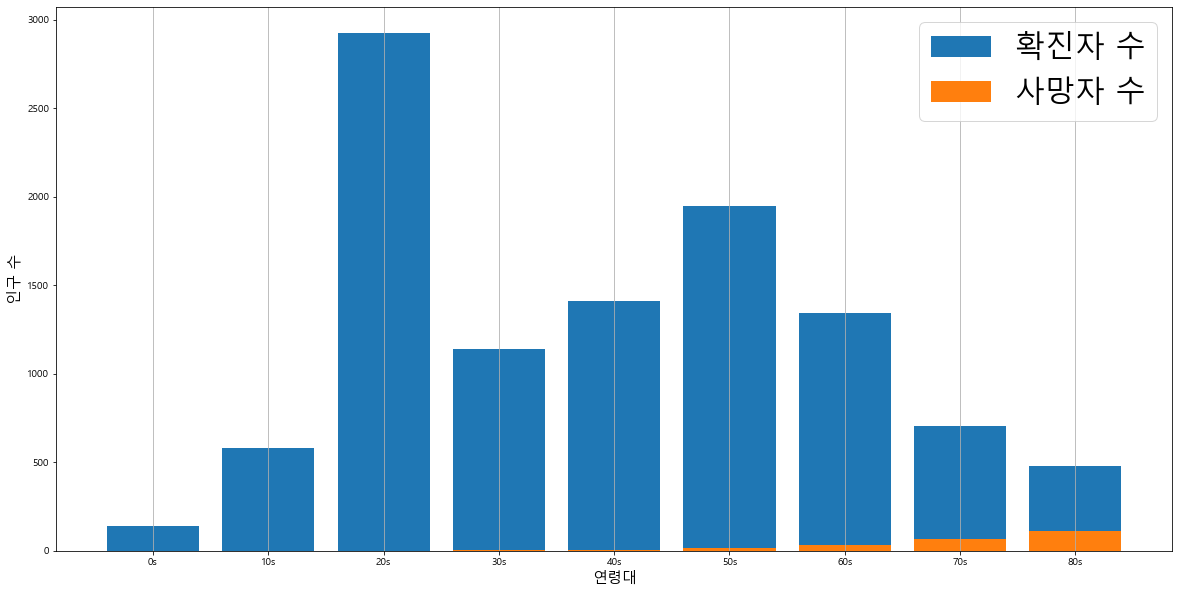

In [41]:
# 마지막 날짜를 기준으로 연령대 변수지정
df_timeage0420 = df_timeage[-9:]
df_timeage0420
plt.figure(figsize=(20,10))

#그래프 그리기
p1=plt.bar(data=df_timeage0420,x='age',height='confirmed')
p2=plt.bar(data=df_timeage0420,x='age',height='deceased')
plt.xlabel('연령대',fontsize=15)
plt.ylabel('인구 수',fontsize=15)
plt.grid(axis='x')

plt.legend((p1,p2),('확진자 수','사망자 수'),fontsize=30)
plt.show()

### 연령대가 높아질수록 급격히 사망률 증가

# 환자수가 많이 발생한 사건 별로 시각화

- Patient Info와 Infection Case 두가지 가용 자료가 존재

In [42]:
df_patientinfo.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [43]:
df_5 = df_patientinfo["infection_case"].fillna("NaN")

In [44]:
df_5 = pd.DataFrame(df_5)
df_5["COUNT"]=1
df_5

,infection_case,COUNT
0,overseas inflow,1
1,overseas inflow,1
2,contact with patient,1
3,overseas inflow,1
4,contact with patient,1
...,...,...
3321,overseas inflow,1
3322,overseas inflow,1
3323,contact with patient,1
3324,overseas inflow,1


In [45]:
df5 = df_5.groupby(["infection_case"]).sum().sort_values(["COUNT"],ascending=False)

- Patient Info 로 정리하니 사건별 정리가 아닌, 감염 형태별 정리만 가능. 

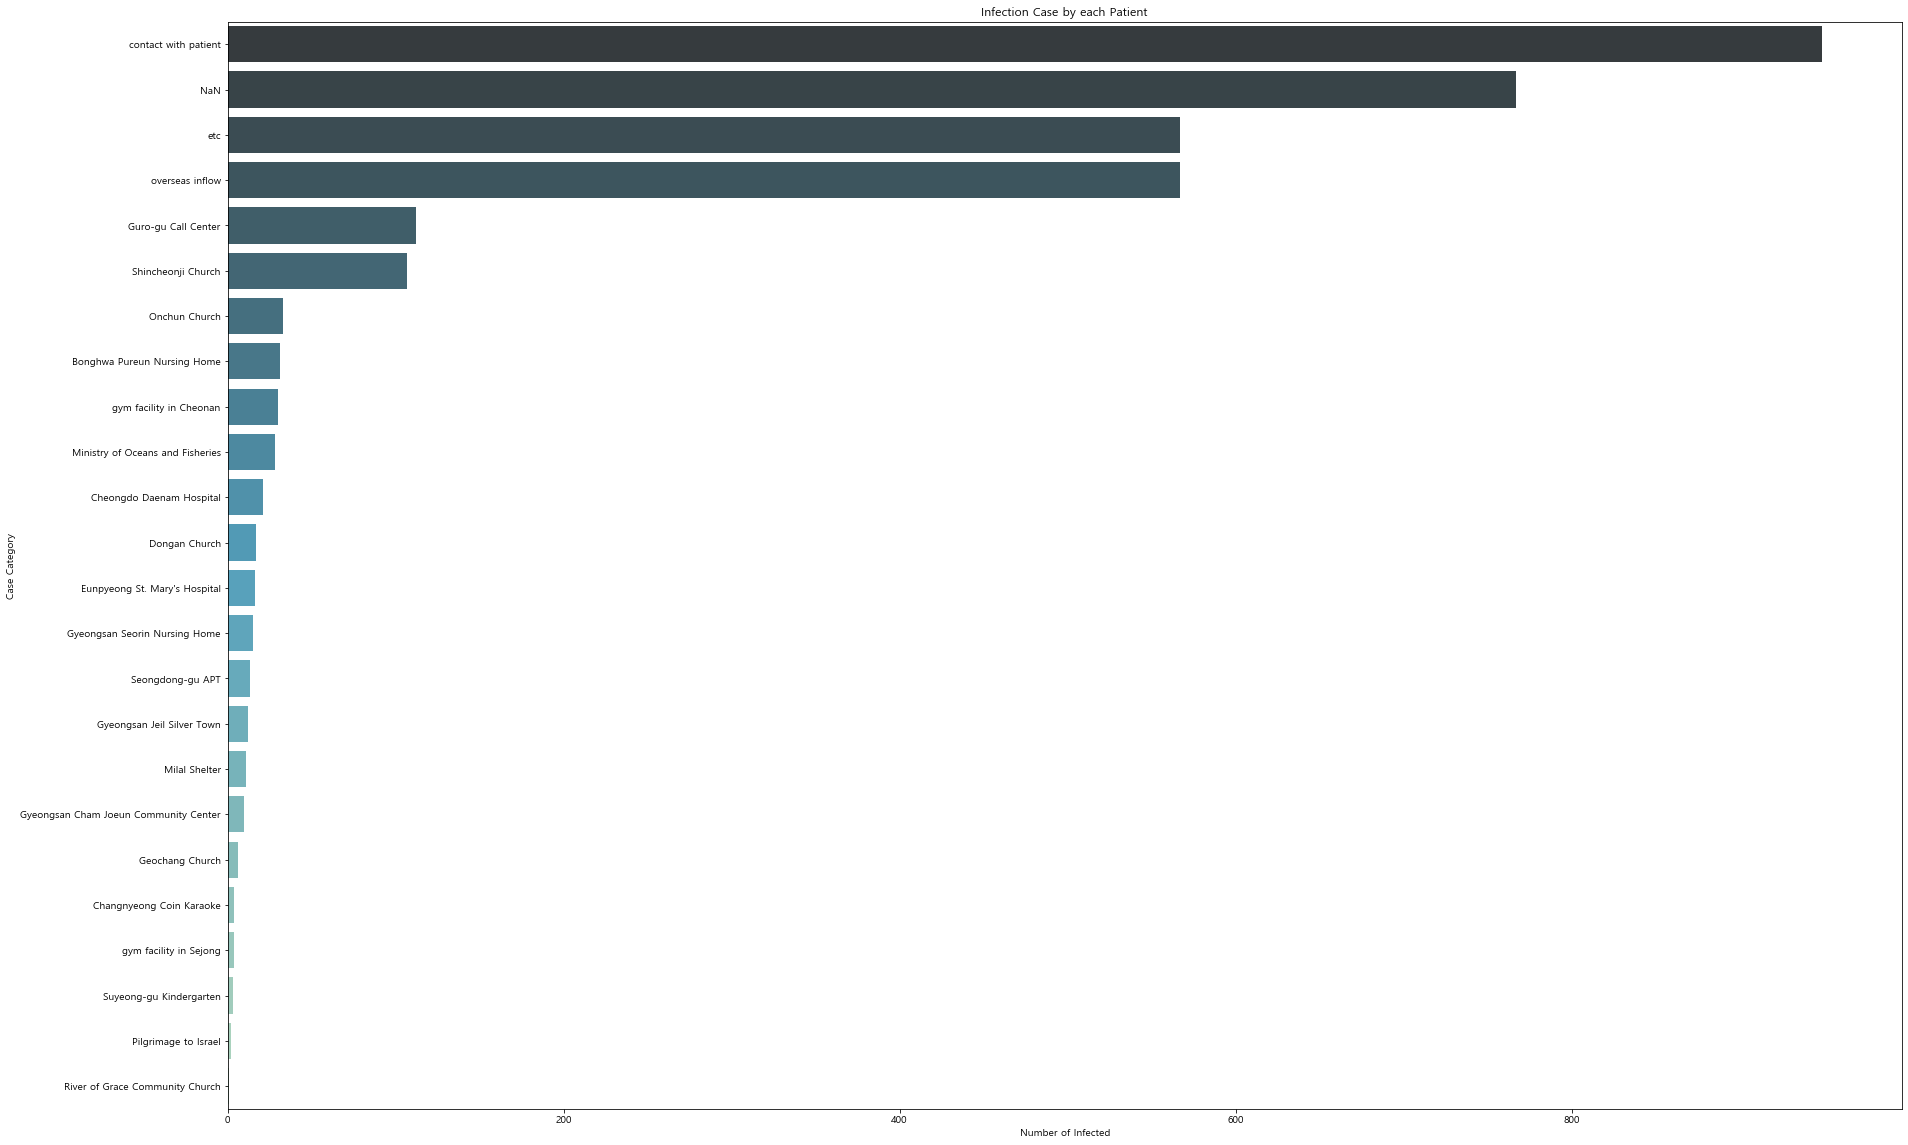

In [46]:
plt.figure(figsize=(30,20))
sns.barplot(x = "COUNT", y = df5.index, data = df5, palette="GnBu_d")
plt.title("Infection Case by each Patient")
plt.xlabel("Number of Infected")
plt.ylabel("Case Category")
plt.show()

- Infection Case 자료 결함 확인

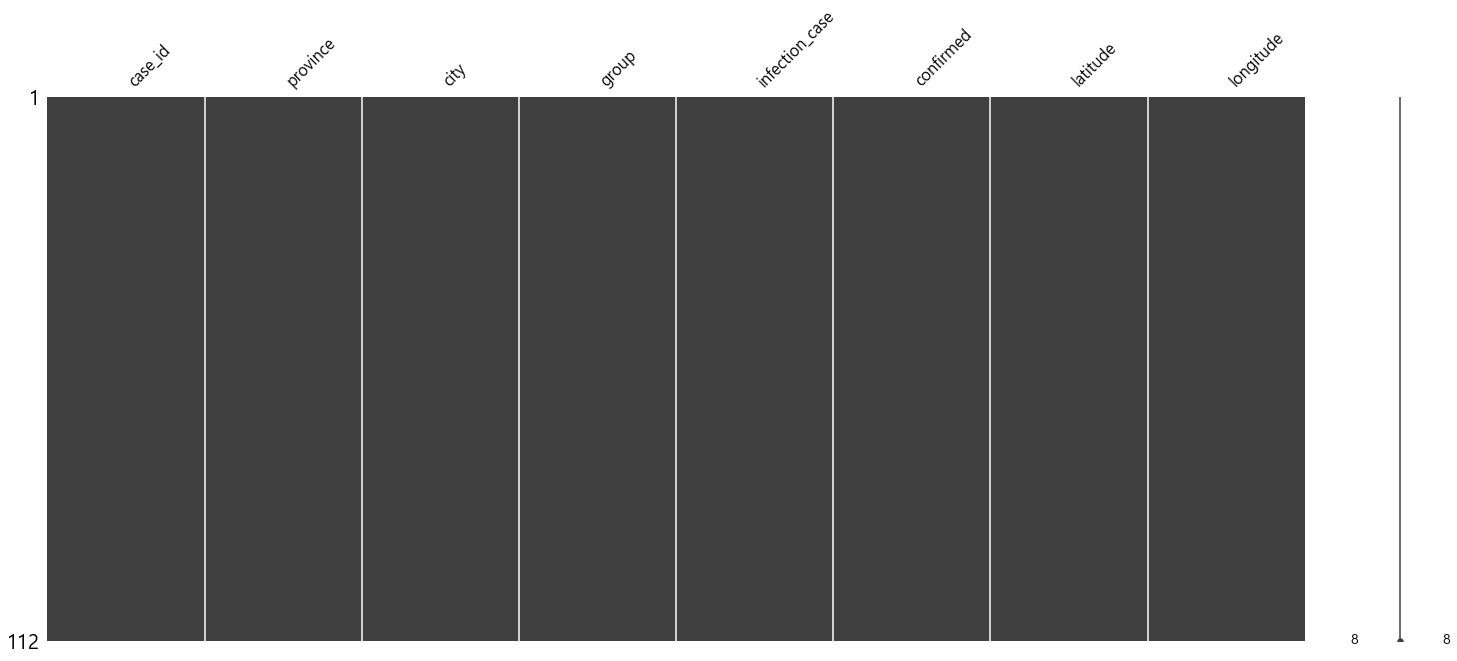

In [47]:
msno.matrix(df_case)

- 사건 별, 그리고 환자수로 그룹바이 하여 상위 10개 추출

In [48]:
df6 = df_case.groupby(df_case["infection_case"])["confirmed"].max()
df6 = df6.sort_values(ascending = False).reset_index()
df6 = df6[0:10]
df6.iloc[2,0] = 'etc(Daegu)'
df6.iloc[1,0] = 'contact with patient(Daegu)'
df6

,infection_case,confirmed
0,Shincheonji Church,4510
1,contact with patient(Daegu),922
2,etc(Daegu),721
3,overseas inflow,313
4,Second Mi-Ju Hospital,195
5,Hansarang Convalescent Hospital,127
6,Cheongdo Daenam Hospital,120
7,gym facility in Cheonan,103
8,Daesil Convalescent Hospital,100
9,Guro-gu Call Center,98


- 상위 10개 사건에 대해 Bar Graph 로 시각화, 상위 3건 모두 대구, 전체 환자수의 62% 상당

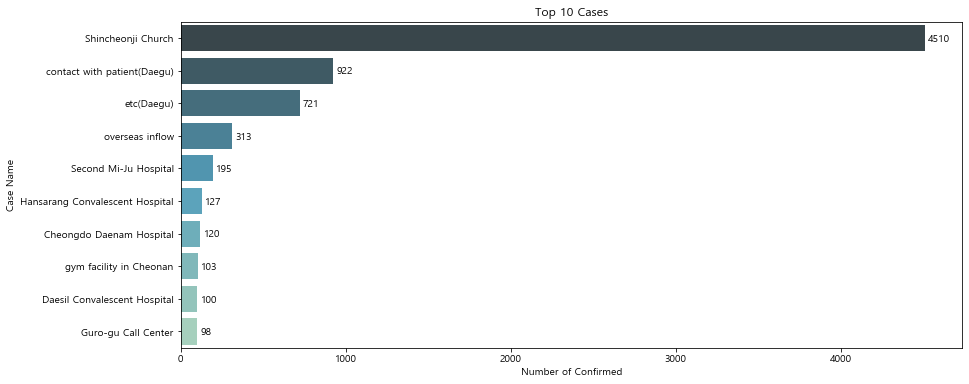

In [49]:
plt.figure(figsize=(14, 6))
sns.barplot(x = "confirmed", y = "infection_case", data = df6, palette="GnBu_d")
plt.xlabel("Number of Confirmed")
plt.ylabel("Case Name")
plt.title("Top 10 Cases")
for value, index in zip(df6["confirmed"], np.linspace(0,10,11)):
    plt.text (value+20, index+0.1, str(value))

In [50]:
df_policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious disease alert level,level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious disease alert level,level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious disease alert level,level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious disease alert level,level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [51]:
df5 = df_5.groupby(["infection_case"]).sum().sort_values(["COUNT"],ascending=False)

In [52]:
#####

<img src="77.png">

### 코로나에 대해 알아보던 중 유독 남성의 사망률이 더 높다는 기사가 많습니다.

### 이에 대해 데이터를 통해 알아보도록 하겠습니다.

#### 성별로 구분해서 알아보기

In [53]:
# 날짜별 성별데이터 확인
df_timegender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
95,2020-04-18,0,female,6360,108
96,2020-04-19,0,male,4297,124
97,2020-04-19,0,female,6364,110
98,2020-04-20,0,male,4302,125


In [54]:
# 위 데이터에서 남성과 여성으로 구분

df_time_male = df_timegender[df_timegender['sex'] == 'male']
df_time_female = df_timegender[df_timegender['sex'] == 'female']

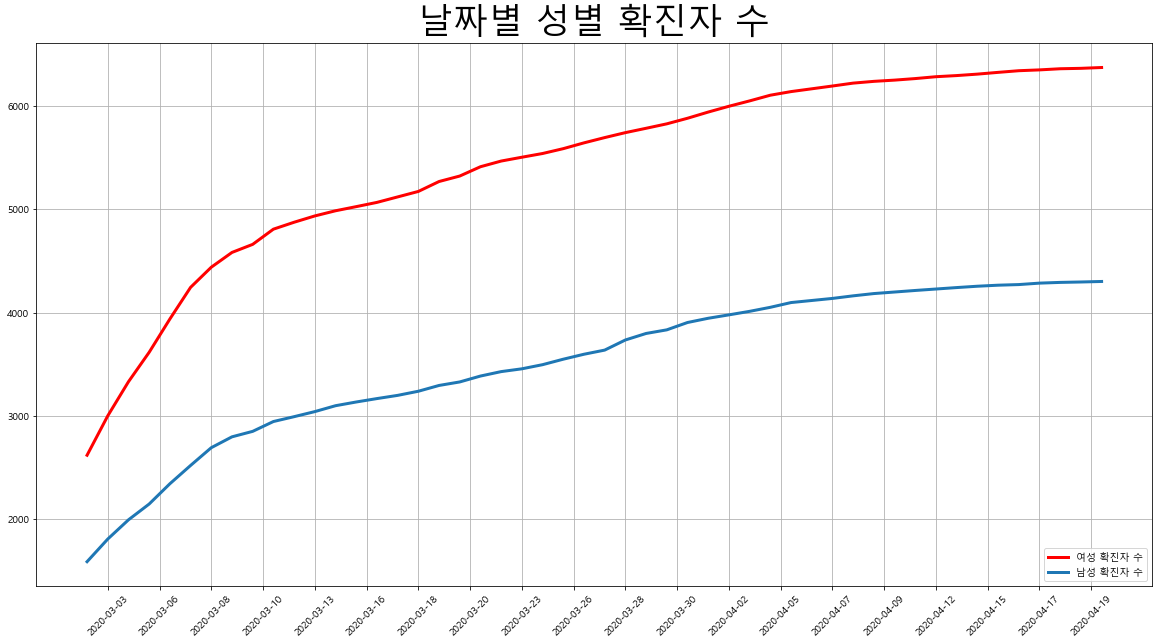

In [55]:
# 날짜별 성별 확진자 수 그래프 그리기


plt.figure(figsize=(20, 10))


plt.plot(df_time_female.date, df_time_female.confirmed,
         linewidth=3, c='r', label='여성 확진자 수')

plt.plot(df_time_male.date, df_time_male.confirmed,
         linewidth=3, label='남성 확진자 수')

plt.xticks(np.arange(1, 50, 2.5), rotation=45)
plt.title('날짜별 성별 확진자 수', fontsize=35)

plt.legend(loc=4)
plt.grid()

#### 여성 확진자 수가 눈에 띄게 더 많음

In [56]:

# 마지막 날짜를 기준으로 확인해보겠음.
df_timegender_last=df_timegender.iloc[-2:]
df_timegender_last

,date,time,sex,confirmed,deceased
98,2020-04-20,0,male,4302,125
99,2020-04-20,0,female,6372,111


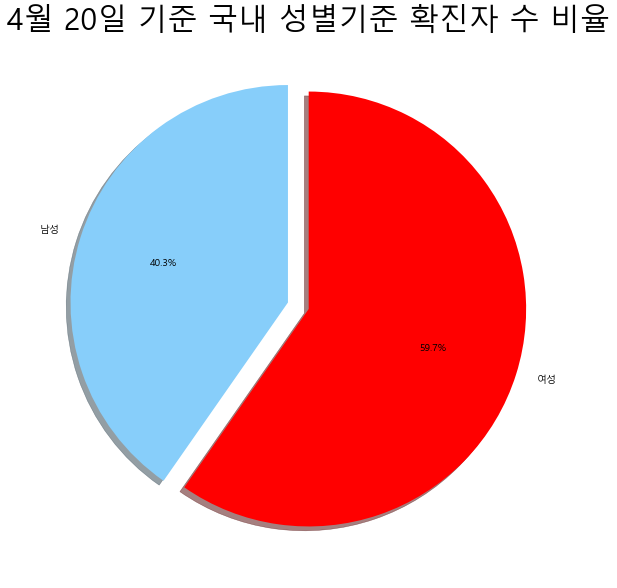

확진자수는 여성이 남성에 비해 약 1.48배 정도 높은 비율로 나타났습니다.










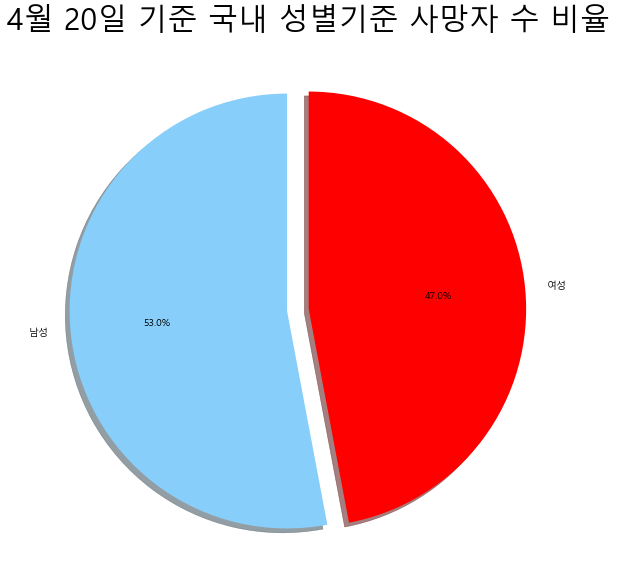

사망자수는 남성이 여성에 비해 약 1.13배 정도 높은 비율로 나타났습니다.










In [57]:
# 성별 국내 확진자 수 비교
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_timegender_last.iloc[0, 3])/df_timegender_last['confirmed'].sum(),
         int(df_timegender_last.iloc[1, 3])/df_timegender_last['confirmed'].sum()]
explode = (0.1, 0.0)
plt.title('4월 20일 기준 국내 성별기준 확진자 수 비율',fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

lulu = round((int(df_timegender_last.iloc[1, 3])/df_timegender_last['confirmed'].sum())/(
    int(df_timegender_last.iloc[0, 3])/df_timegender_last['confirmed'].sum()), 2)
print('확진자수는 여성이 남성에 비해 약 {}배 정도 높은 비율로 나타났습니다.\n\n\n\n\n\n\n\n'.format(lulu))

# 성별 국내 사망자 수 비교
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_timegender_last.iloc[0,4])/df_timegender_last['deceased'].sum(),
         int(df_timegender_last.iloc[1,4])/df_timegender_last['deceased'].sum() ]
explode = (0.1, 0.0 )
plt.title('4월 20일 기준 국내 성별기준 사망자 수 비율',fontsize=30)

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
lulu2 = round((int(df_timegender_last.iloc[0, 4])/df_timegender_last['confirmed'].sum())/(
    int(df_timegender_last.iloc[1, 4])/df_timegender_last['confirmed'].sum()), 2)
print('사망자수는 남성이 여성에 비해 약 {}배 정도 높은 비율로 나타났습니다.\n\n\n\n\n\n\n\n'.format(lulu2))

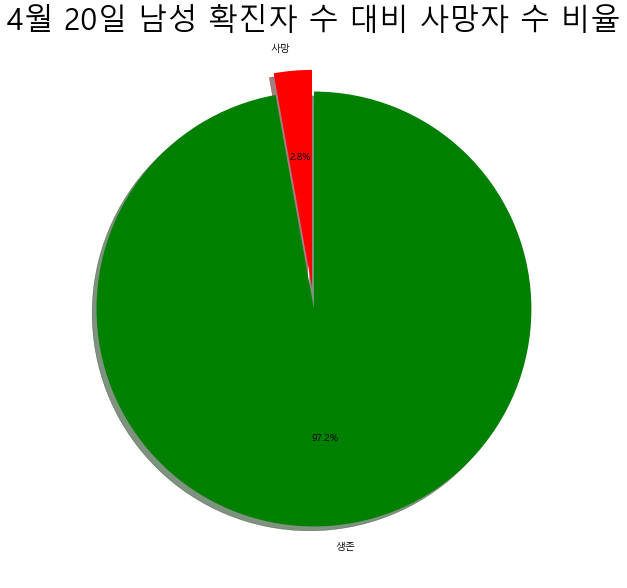

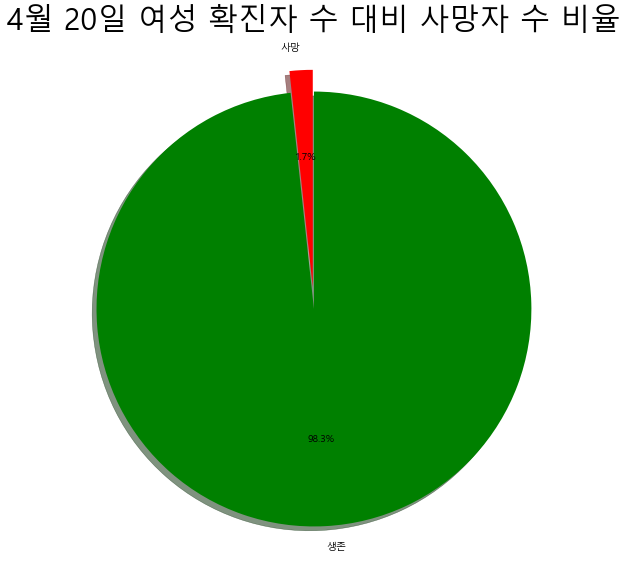

In [58]:
# 남성 확진자 수 대비 사망자 비율 그래프 그리기

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_timegender_last.iloc[0, 4])/(int(df_timegender_last.iloc[0, 4])+int(df_timegender_last.iloc[0, 3])),
         int(df_timegender_last.iloc[0, 3])/(int(df_timegender_last.iloc[0, 4])+int(df_timegender_last.iloc[0, 3]))]
explode = (0.1, 0.0)

plt.title('4월 20일 남성 확진자 수 대비 사망자 수 비율', fontsize=30)

p2 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)


# 여성 확진자 수 대비 사망자 수 비율 그래프 그리기

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_timegender_last.iloc[1, 4])/(int(df_timegender_last.iloc[1, 4])+int(df_timegender_last.iloc[1, 3])),
         int(df_timegender_last.iloc[1, 3])/(int(df_timegender_last.iloc[1, 4])+int(df_timegender_last.iloc[1, 3]))]
explode = (0.1, 0.0)
plt.title('4월 20일 여성 확진자 수 대비 사망자 수 비율', fontsize=30)
p1 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)

### 확진자 수는 여성이 더 많은데 남성의 사망률은 2.8% 이고 여성의 사망률은 1.7%로 남성의 사망률이 더 높게 나왔습니다.

### 국내에서만 이런 현상이 나타났는지 확인

### 해외 데이터로 확장

In [59]:
# https://docs.google.com/spreadsheets/d/e/2PACX-1vQU0SIALScXx8VXDX7yKNKWWPKE1YjFlWc6VTEVSN45CklWWf-uWmprQIyLtoPDA18tX9cFDr-aQ9S6/pubhtml

#해외 데이터로 확장

df_global = pd.read_csv('COVID19_line_list_data.csv')
df_global.tail(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# 성별에 NaN값으로 표기된 열 지우기
df_global_del1 = df_global.dropna(subset=['gender'])
df_global_del1.tail(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1077,1078,16.0,2/25/2020,NaN,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,...,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...,NaN,NaN,NaN,NaN,NaN,NaN
1078,1079,17.0,2/25/2020,NaN,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,...,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print(df_global_del1.shape)

(902, 27)


#### 해외 데이터에선 성별을 포함시킨 데이터가 많지 않음

In [62]:
# 성별이 포함된 해외데이터 상위 5개국 

df_global_del1['country'].value_counts().head(5)

China          197
Japan          185
Hong Kong       94
South Korea     92
Singapore       91
Name: country, dtype: int64

In [63]:
# 해외데이터를 성별로 구분해서 변수 지정
df_global1_male = df_global['gender'] == 'male'
df_global1_female = df_global['gender'] == 'female'

df_male2 = df_global[df_global1_male]
df_female2 = df_global[df_global1_female]

# 변수 확인
df_male2.columns


Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [64]:
# 비율로 나타내기 위해 실수형 데이터로 변환

x1=int(df_male2['gender'].value_counts())
x2=int(df_female2['gender'].value_counts())
x3=int(df_male2['gender'].value_counts())+int(df_female2['gender'].value_counts())

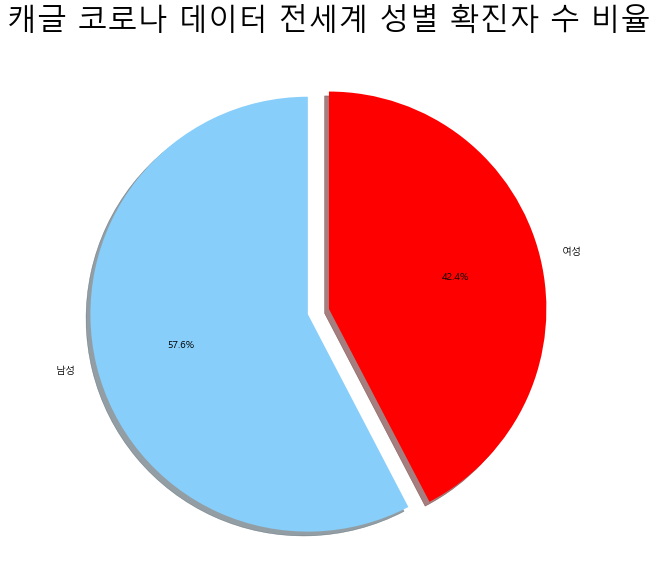

남성의 확진자 수가 여성의 확진자 수보다 1.36배 더 많이 나타났습니다.








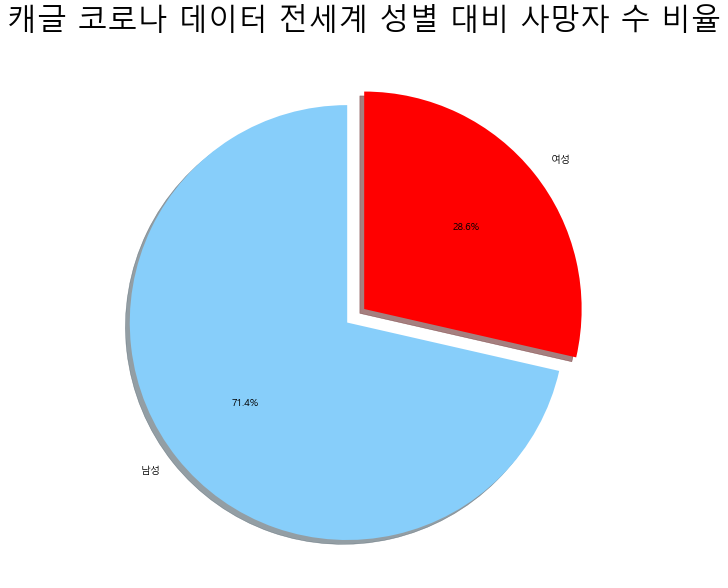

남성의 사망자 수가 여성의 사망자 수보다 2.5배 더 많이 나타났습니다.






In [65]:
# 캐글데이터 전세계 성별 확진자 수 비율 그래프

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [x1/x3,
         x2/x3]
explode = (0.1, 0.0)
plt.title('캐글 코로나 데이터 전세계 성별 확진자 수 비율', fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()
print('남성의 확진자 수가 여성의 확진자 수보다 {}배 더 많이 나타났습니다.\n\n\n\n\n\n'.format(
    round((x1/x3)/(x2/x3), 2)))

# 캐글데이터 전세계 성별 사망자 수 비율 그래프

y1 = df_male2['death'].value_counts()[1]
y2 = df_female2['death'].value_counts()[1]
y3 = df_male2['death'].value_counts()[1] + df_female2['death'].value_counts()[1]


font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [y1/y3,
         y2/y3]
explode = (0.1, 0.0)
plt.title('캐글 코로나 데이터 전세계 성별 대비 사망자 수 비율', fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('남성의 사망자 수가 여성의 사망자 수보다 {}배 더 많이 나타났습니다.\n\n\n\n'.format(
    round((y1/y3)/(y2/y3), 2)))

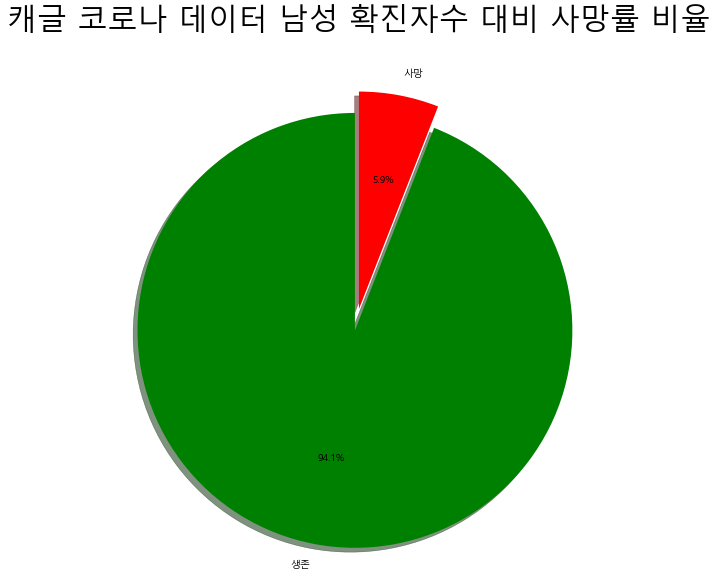

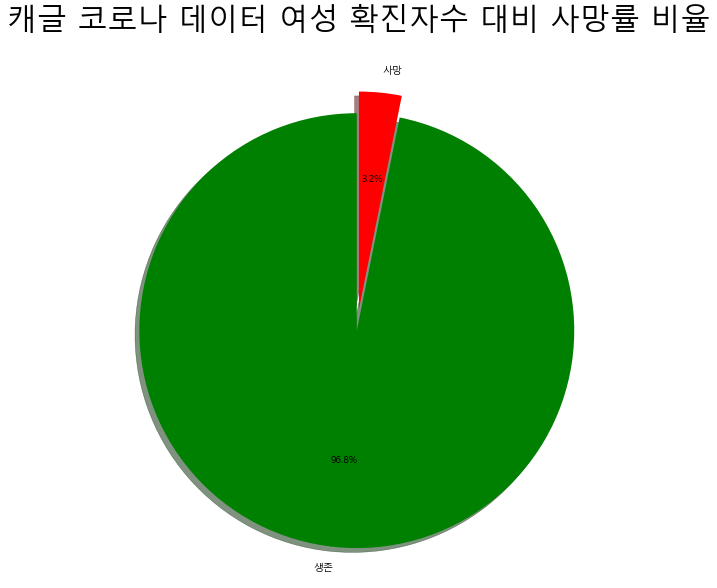

In [66]:
# 남성 사망률
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_male2['death'].value_counts()[0]/df_male2['death'].value_counts()[0],
         df_male2['death'].value_counts()[1]/df_male2['death'].value_counts()[0]]
explode = (0.1, 0.0)
plt.title('캐글 코로나 데이터 남성 확진자수 대비 사망률 비율',fontsize=30)
q1 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('\n\n\n\n\n\n\n')

# 여성 사망률
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_female2['death'].value_counts()[0]/df_female2['death'].value_counts()[0],
         df_female2['death'].value_counts()[1]/df_female2['death'].value_counts()[0]]
explode = (0.1, 0.0)
plt.title('캐글 코로나 데이터 여성 확진자수 대비 사망률 비율',fontsize=30)
q2 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)

### 남성의 사망률은 5.9% 이고 여성의 사망률은 3.2% 로 국내뿐만 아니라 해외에서도 남성의 사망률이 훨씬 높았습니다.

### 남성의 사망률이 더 높은 이유로는 __환경적 요인__ 과 __유전적 요인__ 으로 나눌 수 있는데, 이에 대해서는 추후에 좀 더 데이터가 많아지고, 코로나에 관한 논문이 자세해진다면 확인해보도록 하겠습니다.

In [67]:
patient = df_patientinfo

In [68]:
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [69]:
date_patient = patient[['patient_id', 'confirmed_date', 'country', 'infection_case']]
date_patient = date_patient.sort_values(by='confirmed_date').reset_index()
patient_1= date_patient.loc[date_patient['confirmed_date']=='2020-04-01']
patient_1.head()

,index,patient_id,confirmed_date,country,infection_case
2882,480,1000000481,2020-04-01,Korea,overseas inflow
2883,481,1000000482,2020-04-01,Korea,overseas inflow
2884,483,1000000484,2020-04-01,Korea,overseas inflow
2885,1016,1600000040,2020-04-01,Korea,overseas inflow
2886,484,1000000485,2020-04-01,Korea,overseas inflow


In [70]:
patient_1.iloc[0].name

2882

In [71]:
# 4.1일 기준으로 나누기 - 이전
march =  date_patient[:patient_1.iloc[0].name]
before_kor = march.loc[march['infection_case']!='overseas inflow']
before_overseas = march.loc[march['infection_case']=='overseas inflow']
before_overseas.sort_values(by='confirmed_date', ascending=False).head()

,index,patient_id,confirmed_date,country,infection_case
2881,469,1000000470,2020-03-31,Korea,overseas inflow
2826,1555,2000000491,2020-03-31,Korea,overseas inflow
2836,914,1400000069,2020-03-31,Korea,overseas inflow
2833,839,1300000024,2020-03-31,Korea,overseas inflow
2832,838,1300000023,2020-03-31,Korea,overseas inflow


In [72]:
# 4.1일 기준으로 나누기 - 이후
april =  date_patient[patient_1.iloc[0].name:]
after_kor = april.loc[april['infection_case']!='overseas inflow']
after_overseas = april.loc[april['infection_case']=='overseas inflow']
after_overseas.head()

,index,patient_id,confirmed_date,country,infection_case
2882,480,1000000481,2020-04-01,Korea,overseas inflow
2883,481,1000000482,2020-04-01,Korea,overseas inflow
2884,483,1000000484,2020-04-01,Korea,overseas inflow
2885,1016,1600000040,2020-04-01,Korea,overseas inflow
2886,484,1000000485,2020-04-01,Korea,overseas inflow


In [73]:

from pyecharts import Pie
before_kor = len(before_kor)
before_over = len(before_overseas)
after_kor = len(after_kor)
after_over = len(after_overseas)

name = ['해외 감염자', '국내 감염자']
data = [before_over, before_kor]
data2 = [after_over, after_kor]
pie = Pie("4.1 전(left)/ 후(right) 해외 감염자, 국내 감염자 비율", title_pos="center")
pie.add("4.1 전", name, data, center=[25,50], radius=[20,40], is_label_show=True,
       legend_orient='vertical', legend_pos='left')
pie.add("4.1 후", name, data2, center=[65,50], radius=[20,40], is_label_show=True,
       legend_orient='vertical', legend_pos='left')
pie

In [74]:
pt= patient[['patient_id','infection_case','confirmed_date']]
pt_sorted = pt.sort_values(by='confirmed_date' ,ascending=True)
pt_sorted

,patient_id,infection_case,confirmed_date
846,1400000001,overseas inflow,2020-01-20
0,1000000001,overseas inflow,2020-01-23
1065,2000000001,overseas inflow,2020-01-26
1066,2000000002,overseas inflow,2020-01-27
2,1000000003,contact with patient,2020-01-30
...,...,...,...
1720,2000000656,contact with patient,2020-04-19
1719,2000000655,overseas inflow,2020-04-19
2923,6011000051,etc,NaN
2924,6011000052,etc,NaN


In [75]:
# 당일 확진자 데이터 추출 
df = df_time.loc[:,['date']]
data = [0]
for i in range(1, len(df_time)):
    tmp = df_time.loc[i]['confirmed'] - df_time.loc[i-1]['confirmed']
    data.append(tmp)
    
df['daily-confirmed']=data 
df.tail()

,date,daily-confirmed
87,2020-04-16,22
88,2020-04-17,22
89,2020-04-18,18
90,2020-04-19,8
91,2020-04-20,13


In [76]:
# 해외 감염자 수 추출 
overseas = patient.loc[patient['infection_case']=='overseas inflow']
overseas = overseas[['patient_id','country','confirmed_date']]
o_patient = overseas.groupby(by='confirmed_date').count()
o_patient.head()

,patient_id,country
confirmed_date,,
2020-01-20,1,1
2020-01-23,1,1
2020-01-26,1,1
2020-01-27,1,1
2020-01-30,2,2


In [77]:
# 해외 유입자 그래프로를 통해 시각화

name = o_patient.index
data = o_patient.patient_id

line = Line("")
line.add("Daily Number of overseas infected", name, data, is_symbol_show=True, is_legend_show=True,
         mark_point=['max'],mark_line=['average'])

o_patient["Policy1"]=0
o_patient["Policy2"]=0
o_patient.loc[o_patient.index=='2020-04-01',"Policy1"]=50
o_patient.loc[o_patient.index=='2020-03-19',"Policy2"]=50
policy1 = list(o_patient.Policy1)
policy2 = list(o_patient.Policy2)

bar=Bar('')
bar.add("Overseas Isolation 2week",name,policy1)
bar.add("Special Quarantin Declaration",name,policy2)


overlap=Overlap()
overlap.add(bar)
overlap.add(line)

overlap

# 나이(연령대)에 따라 고령자의 사망률이 높은가?
# 젊을수록 완치가 잘될까?

In [78]:
PatientInfo = pd.read_csv('PatientInfo.csv')
Region = pd.read_csv('Region.csv')
Time = pd.read_csv('Time.csv')
TimeProvince = pd.read_csv('TimeProvince.csv')

In [79]:
# 출생년도 기준 실제나이 계산
PatientInfo['real_age'] = 2020 - PatientInfo['birth_year']

In [80]:
# 연령대 기준 --> 비여있는 출생년도, 실제나이 계산 (그 연령대의 평균으로 반영)
t = PatientInfo.groupby('age')['birth_year'].mean()
for idx, val in t.items():
    PatientInfo.loc[PatientInfo['birth_year'].isnull() & (PatientInfo['age'] == idx), 'birth_year'] = val

PatientInfo['real_age'] = 2020 - PatientInfo['birth_year']

In [81]:
# 나이관련 필드의 null 갯수 동일
PatientInfo[['birth_year', 'age', 'real_age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
birth_year    3252 non-null float64
age           3252 non-null object
real_age      3252 non-null float64
dtypes: float64(2), object(1)
memory usage: 78.1+ KB


## 환자의 상태와 날짜가 누락된것을 전처리
 - 환자의 상태 field와 날짜에 대한 field가 맞지 않음 -> 이를 처리
 - 격리(isolated)상태인데 확진일자가 없거나, 복귀(released)상태인데 완치일이 없는 경우
 - 주의 사항: 날짜값이 없음(밑에 내용에 있음)데이터를 예측하고자 하면 문제가 생김

In [82]:
PatientInfo['state'].value_counts()

released    1637
isolated    1622
deceased      67
Name: state, dtype: int64

In [83]:
# 상태에 대한 값이 없으나 확진일자가 있음 -> 상태를 isolated로 변경
PatientInfo.loc[PatientInfo['state'].isnull() & PatientInfo['confirmed_date'].notnull(), 'state'] = 'isolated'

In [84]:
# 확진으로 격리상태이나 확진일자가 없음 
t = PatientInfo.loc[(PatientInfo['state'] == 'isolated') & PatientInfo['confirmed_date'].isnull(), :]
print('격리상태이나 확진일자 없음:', len(t), '건')
t.head(3)

격리상태이나 확진일자 없음: 3 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,40.0
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,9.0
2925,6011000053,NaN,female,2001.0,10s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,2020-04-15,NaN,NaN,NaN,isolated,19.0


In [85]:
# 데이터에 격리상태인데 완치일자가 존재 --> 상태를 relased로 변경
PatientInfo.loc[(PatientInfo['state'] == 'isolated') & PatientInfo['released_date'].notnull(), 'state'] = 'released'

In [86]:
# 완치상태이나 완치일자가 없음
t = PatientInfo.loc[(PatientInfo['state'] == 'released') & PatientInfo['released_date'].isnull(), :]
print('완치상태이나 완치일자 없음:', len(t), '건')
t.head(3)

완치상태이나 완치일자 없음: 428 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
12,1000000013,29.0,male,1938.0,80s,Korea,Seoul,Jongno-gu,NaN,contact with patient,4.0,1.000000e+09,117.0,NaN,2020-02-16,NaN,NaN,released,82.0
17,1000000018,111.0,male,2000.0,20s,Korea,Seoul,etc,NaN,etc,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,released,20.0
19,1000000020,121.0,female,1944.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,1.000000e+09,NaN,NaN,2020-02-20,NaN,NaN,released,76.0


In [87]:
# 사망상태이나 사망일자가 없음
t = PatientInfo.loc[(PatientInfo['state'] == 'deceased') & PatientInfo['deceased_date'].isnull(), :]
print('사망상태이나 사망일자 없음:', len(t), '건')
t.head()

사망상태이나 사망일자 없음: 7 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
108,1000000109,6773.0,male,1929.0,90s,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased,91.0
284,1000000285,8602.0,male,1976.0,40s,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased,44.0
694,1100000071,NaN,male,1941.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased,79.0
718,1100000095,NaN,female,1932.0,80s,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased,88.0
720,1100000097,NaN,male,1947.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased,73.0


## 날짜 전처리
 - 날짜자체를 날짜 형식으로 변환
 - 기간(period) 필드를 추가함
   - symptom_confirmed_period: 상태발현 부터 확진까지 기간
   - confirmed_released_period: 확진 부터 완치까지 기간
   - confirmed_deceased_period: 확진 부터 사망까지 기간

In [88]:
# 날짜형식으로 변환
PatientInfo['symptom_onset_date'] = pd.to_datetime(PatientInfo['symptom_onset_date'],errors='coerce', format='%Y-%m-%d')
# error = 'coerce' 날짜데이터 중 invalid한것을 NA(T)로 세팅 (If 'coerce', then invalid parsing will be set as NaT)
PatientInfo['confirmed_date'] = pd.to_datetime(PatientInfo['confirmed_date'], format='%Y-%m-%d')
PatientInfo['released_date'] = pd.to_datetime(PatientInfo['released_date'], format='%Y-%m-%d')
PatientInfo['deceased_date'] = pd.to_datetime(PatientInfo['deceased_date'], format='%Y-%m-%d')

# 날짜간의 기간을 계산
PatientInfo['symptom_confirmed_period'] = PatientInfo['confirmed_date'] - PatientInfo['symptom_onset_date']
PatientInfo['confirmed_released_period'] = PatientInfo['released_date'] - PatientInfo['confirmed_date']
PatientInfo['confirmed_deceased_period'] = PatientInfo['deceased_date'] - PatientInfo['confirmed_date']

PatientInfo[['symptom_onset_date', 'confirmed_date','released_date', 'deceased_date', 'symptom_confirmed_period', 'confirmed_released_period', 'confirmed_deceased_period']].head()

,symptom_onset_date,confirmed_date,released_date,deceased_date,symptom_confirmed_period,confirmed_released_period,confirmed_deceased_period
0,2020-01-22,2020-01-23,2020-02-05,NaT,1 days,13 days,NaT
1,NaT,2020-01-30,2020-03-02,NaT,NaT,32 days,NaT
2,NaT,2020-01-30,2020-02-19,NaT,NaT,20 days,NaT
3,2020-01-26,2020-01-30,2020-02-15,NaT,4 days,16 days,NaT
4,NaT,2020-01-31,2020-02-24,NaT,NaT,24 days,NaT


## 고령자의 사망가능성과 젊을수록 완치율이 높은지에 대해 진행

In [89]:
df = PatientInfo[PatientInfo['age'].notnull() & PatientInfo['state'].isin(['released', 'deceased'])]
obs = pd.pivot_table(df, index='age', columns=['state'], values=['patient_id'], aggfunc=[len])
obs = obs.fillna(0)
obs.columns = ['deceased', 'released']
obs # 연령대별 사망 완치 관측치

,deceased,released
age,,
0s,0.0,29.0
10s,0.0,76.0
20s,0.0,444.0
30s,1.0,226.0
40s,2.0,256.0
50s,7.0,316.0
60s,11.0,174.0
70s,18.0,66.0
80s,21.0,37.0


#### 카이제곱 검정

In [90]:
# 카이제곱 검정
from scipy.stats import chi2_contingency
c, p, dof, ex = chi2_contingency(obs, correction=False) # 카이제곱 검정
exp = pd.DataFrame(ex, obs.index, columns=['dec exp', 'rel exp'])
exp # 사망 기대치  완치 기대치

,dec exp,rel exp
age,,
0s,1.141598,27.858402
10s,2.991774,73.008226
20s,17.478261,426.521739
30s,8.935958,218.064042
40s,10.156287,247.843713
50s,12.715041,310.284959
60s,7.282609,177.717391
70s,3.306698,80.693302
80s,2.283196,55.716804


#### 사망의 경우 : 40대 이전까지는 기대치보다 적게 사망하며, 50대 부터는 기대치보다 사망이 많아지는 경향
#### 완치의 경우 : 40대 이전까지는 기대치보다 많이 완치되며, 50대 부터는 기대치보다 완치가 적어지는 경항 
#### -> 40대까지는 예상보다 코로나의 사망이 적고 완치가 잘 되며 50대 이후부터는 사망자가 늘며 완치는 어려워짐

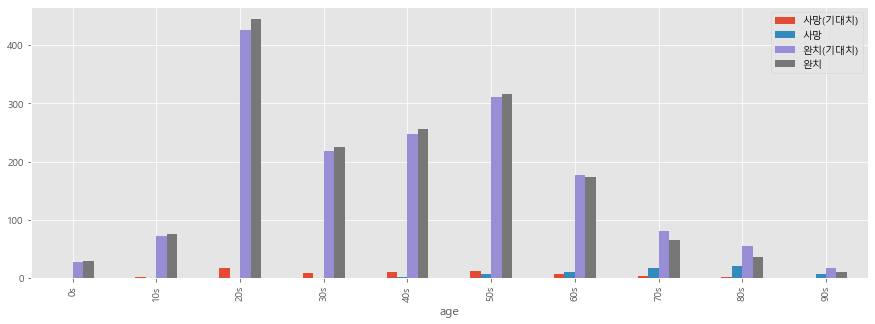

In [91]:
df = pd.concat([obs, exp], axis=1).sort_index(axis=1)
df.columns = ['사망(기대치)', '사망', '완치(기대치)', '완치']
df.plot.bar(figsize=(15,5))

In [92]:
df = PatientInfo.loc[PatientInfo['confirmed_released_period'].notnull() & PatientInfo['sex'].notnull(), ['sex', 'real_age', 'confirmed_released_period']]
df['confirmed_released_period'] = df['confirmed_released_period'].dt.days
df.loc[df['sex']=='male', 'sex'] = 0
df.loc[df['sex']=='female', 'sex'] = 1
df.head()

,sex,real_age,confirmed_released_period
0,0,56.0,13
1,0,33.0,32
2,0,56.0,20
3,0,29.0,16
4,1,28.0,24


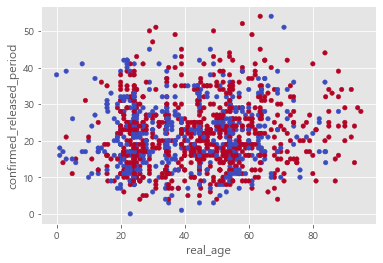

In [93]:
# 나이와 기간을 시각화
# 색상이 남여 차이를 보여줌
df.plot.scatter(x='real_age', y='confirmed_released_period', c='sex',colormap='coolwarm', colorbar=False)

In [94]:
# 나이와 기간의 상관계수를 계산
# 상관계수 = 0.085로 1보다 현저히 작으므로 상관관계가 없음

corr = df['real_age'].corr(df['confirmed_released_period'])
print('상관계수:{0:.3f}'.format(corr))
corr

상관계수:0.085


0.08453638260821017

## 코로나 발생 전 후의 미세먼지양

 1. cleanair.seoul.go.kr에서 받아온 엑셀 파일 수집
 2. 월별로 초미세먼지 데이터가 나눠저 있어 이를 필요에 의해 데이터를 전처리하고자 함
 3. 코로나가 처음발생한 2020년1월 ~ 4월데이터와 작년 2019년1월 ~ 4월데이터를 비교

1. 2019년 1-4월 미세먼지 데이터

In [95]:
df_PM1 = pd.read_csv('1901-04PM.csv')

In [96]:
df_PM1.head(3)

,date,PM
0,2019-01-01,25
1,2019-01-02,22
2,2019-01-03,24


Text(0.5, 1.0, '2019 PM')

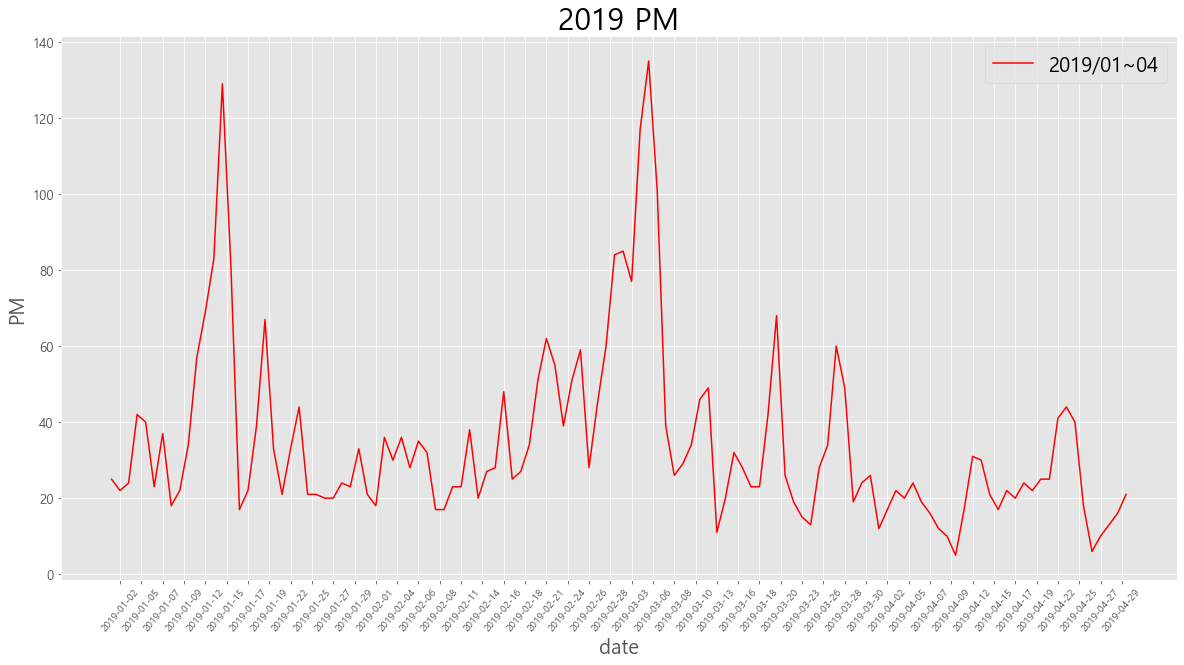

In [97]:
plt.figure(figsize=(20,10))
plt.plot(df_PM1['date'], df_PM1['PM'], color='red')
plt.xticks(np.arange(1, 120, 2.5),rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['2019/01~04'], loc='best', fontsize=20)
plt.title('2019 PM', size=30)

2. 2020년 1-4월 미세먼지 데이터

In [98]:
df_PM2 = pd.read_csv('2001-04PM.csv')

Text(0.5, 1.0, '2020 PM')

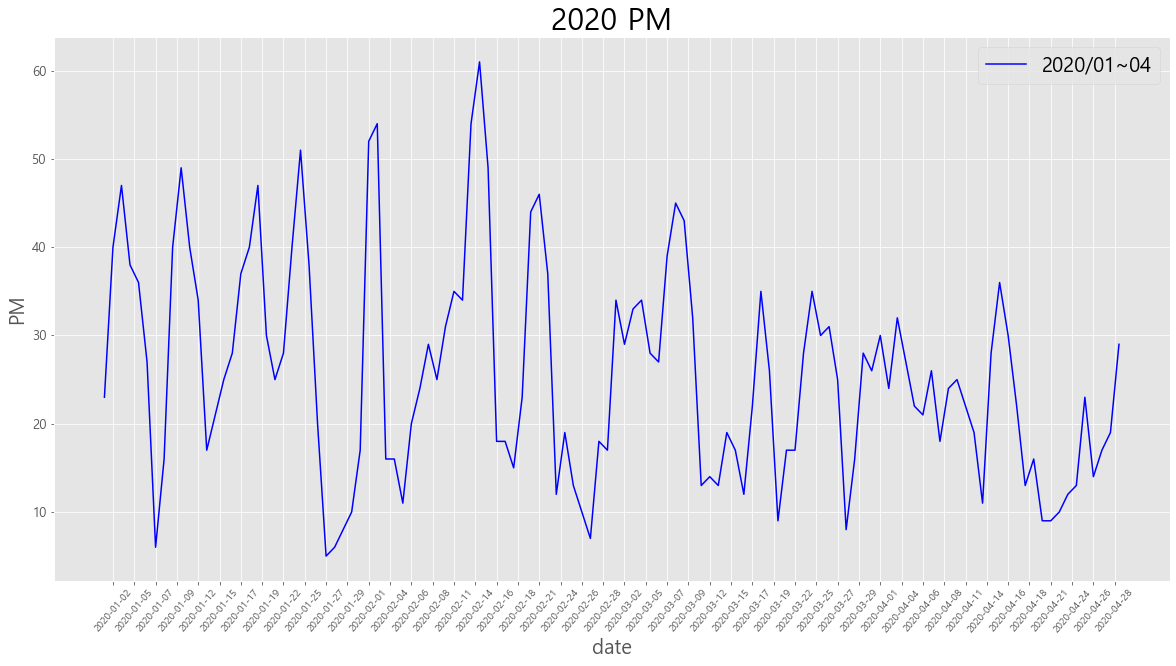

In [99]:
plt.figure(figsize=(20,10))
plt.plot(df_PM2['date'], df_PM2['PM'], color='blue')
plt.xticks(np.arange(1, 120, 2.5),rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['2020/01~04'], loc='best', fontsize=20)
plt.title('2020 PM', size=30)

3. 2019년 2020년 데이터 합침

In [100]:
df_PM = pd.read_csv('PM_sum_1.csv')

In [101]:
df_PM.head(3)

,date,1901,1902,1903,1904,2001,2002,2003,2004
0,1,25,18.0,84,12.0,23,52.0,34,30.0
1,2,22,36.0,85,17.0,40,54.0,29,24.0
2,3,24,30.0,77,22.0,47,16.0,33,32.0


Text(0.5, 1.0, '2019&2020 PM')

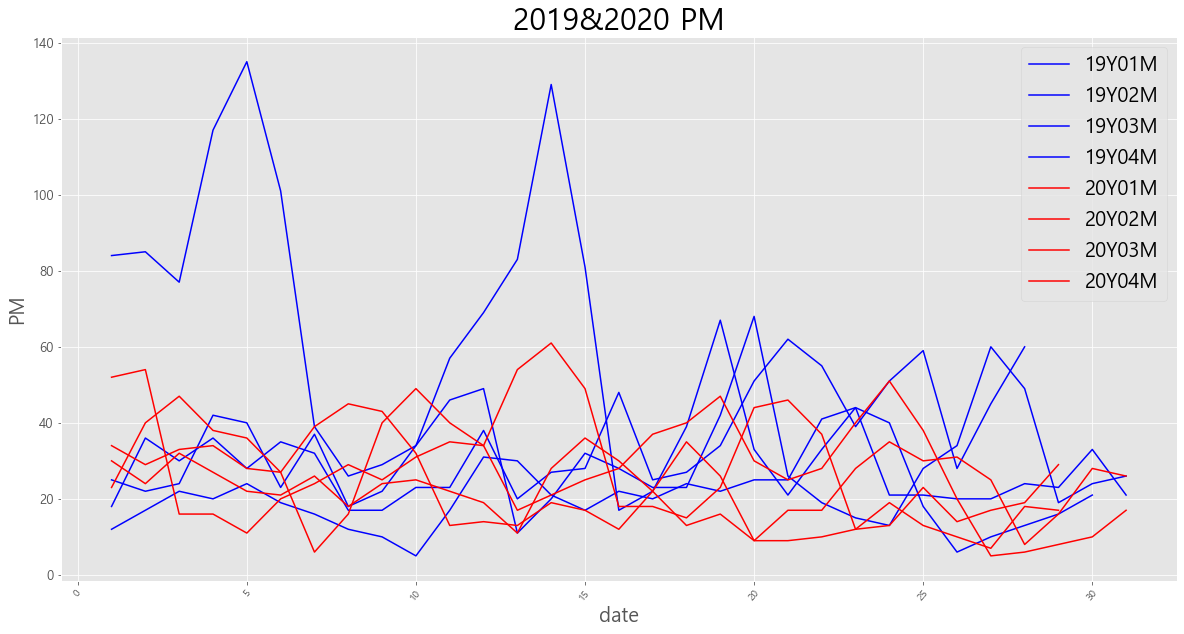

In [102]:
plt.figure(figsize=(20,10))
plt.plot(df_PM['date'], df_PM['1901'], color='blue')
plt.plot(df_PM['date'], df_PM['1902'], color='blue')
plt.plot(df_PM['date'], df_PM['1903'], color='blue')
plt.plot(df_PM['date'], df_PM['1904'], color='blue')
plt.plot(df_PM['date'], df_PM['2001'], color='red')
plt.plot(df_PM['date'], df_PM['2002'], color='red')
plt.plot(df_PM['date'], df_PM['2003'], color='red')
plt.plot(df_PM['date'], df_PM['2004'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y01M', '19Y02M', '19Y03M', '19Y04M', '20Y01M', '20Y02M', '20Y03M', '20Y04M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

### 분석하고자 하는 부분이 명확하지 않음

4. 년별 동월의 데이터를 그래프로 표현

Text(0.5, 1.0, '2019&2020 PM')

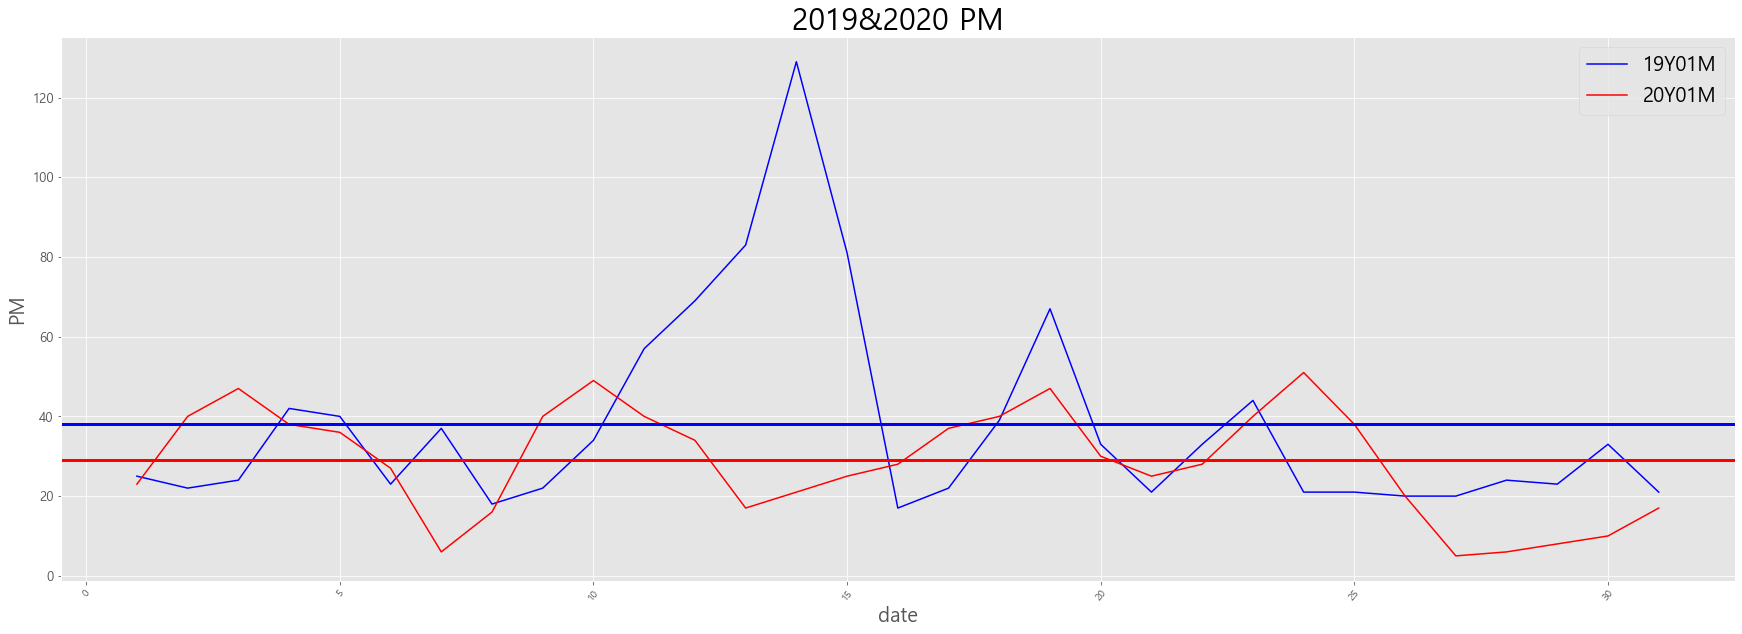

In [103]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1901'], color='blue')
plt.plot(df_PM['date'], df_PM['2001'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 38, color='blue', linewidth=3)
plt.axhline(y= 29, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y01M', '20Y01M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

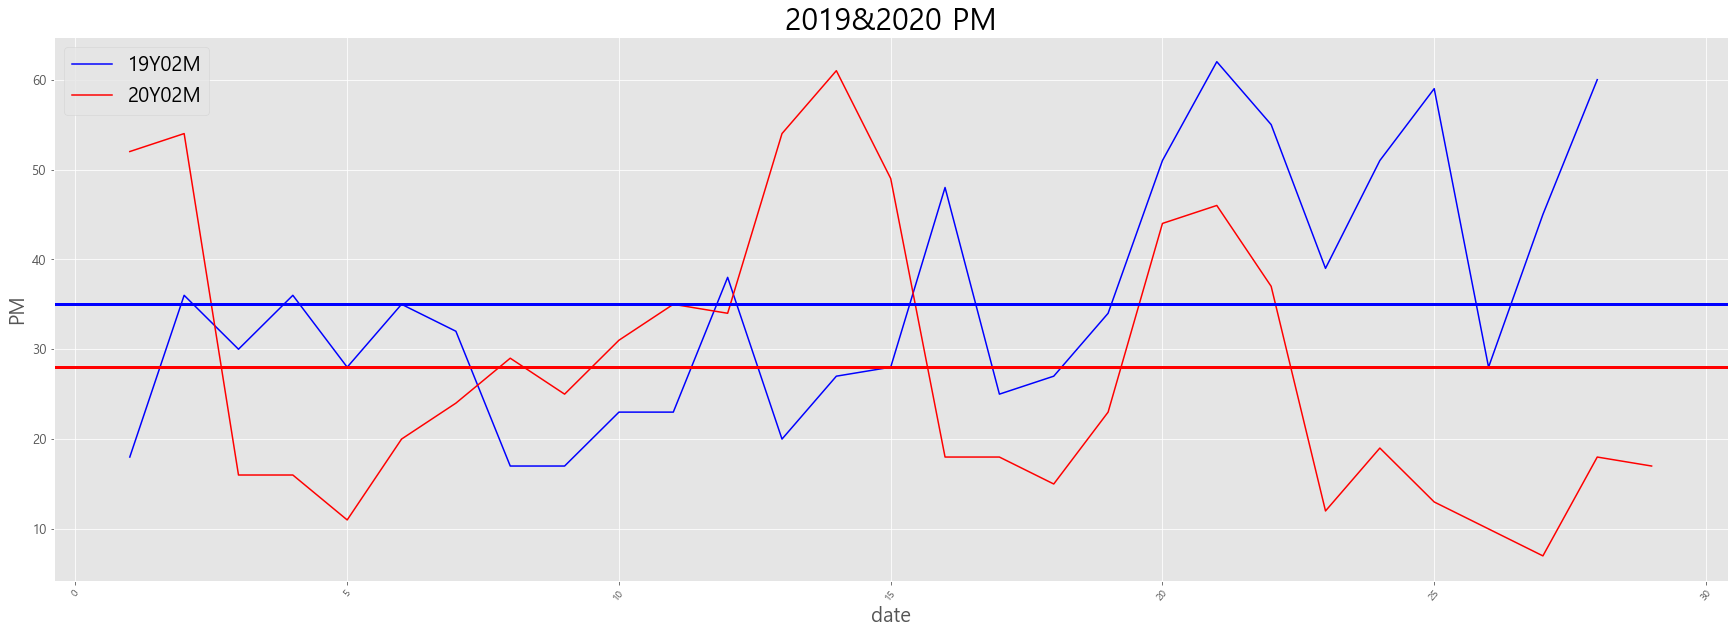

In [104]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1902'], color='blue')
plt.plot(df_PM['date'], df_PM['2002'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 35, color='blue', linewidth=3)
plt.axhline(y= 28, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y02M', '20Y02M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

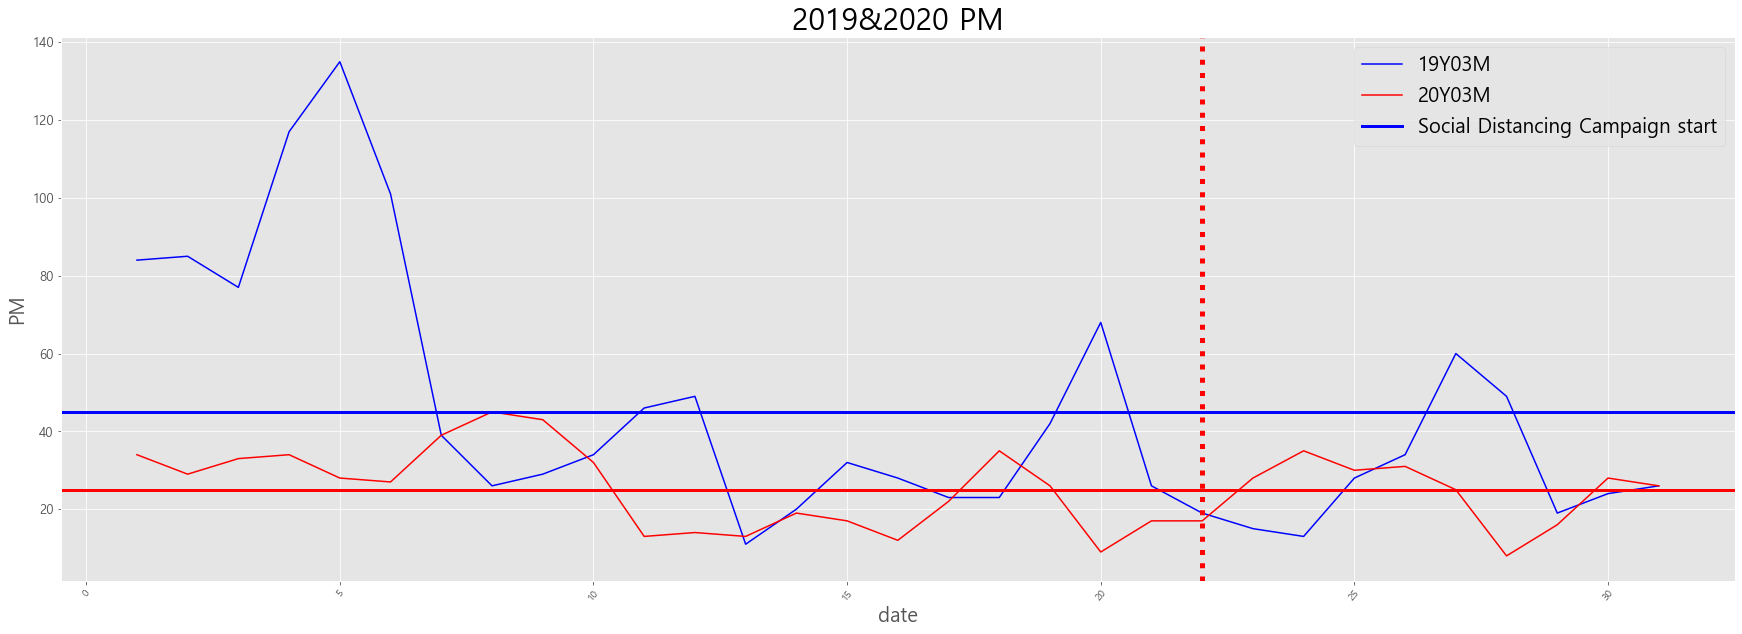

In [105]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1903'], color='blue')
plt.plot(df_PM['date'], df_PM['2003'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 45, color='blue', linewidth=3)
plt.axhline(y= 25, color='red', linewidth=3)
plt.axvline(x= 22, ls=':', c='r', linewidth= 5)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y03M', '20Y03M', 'Social Distancing Campaign start'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

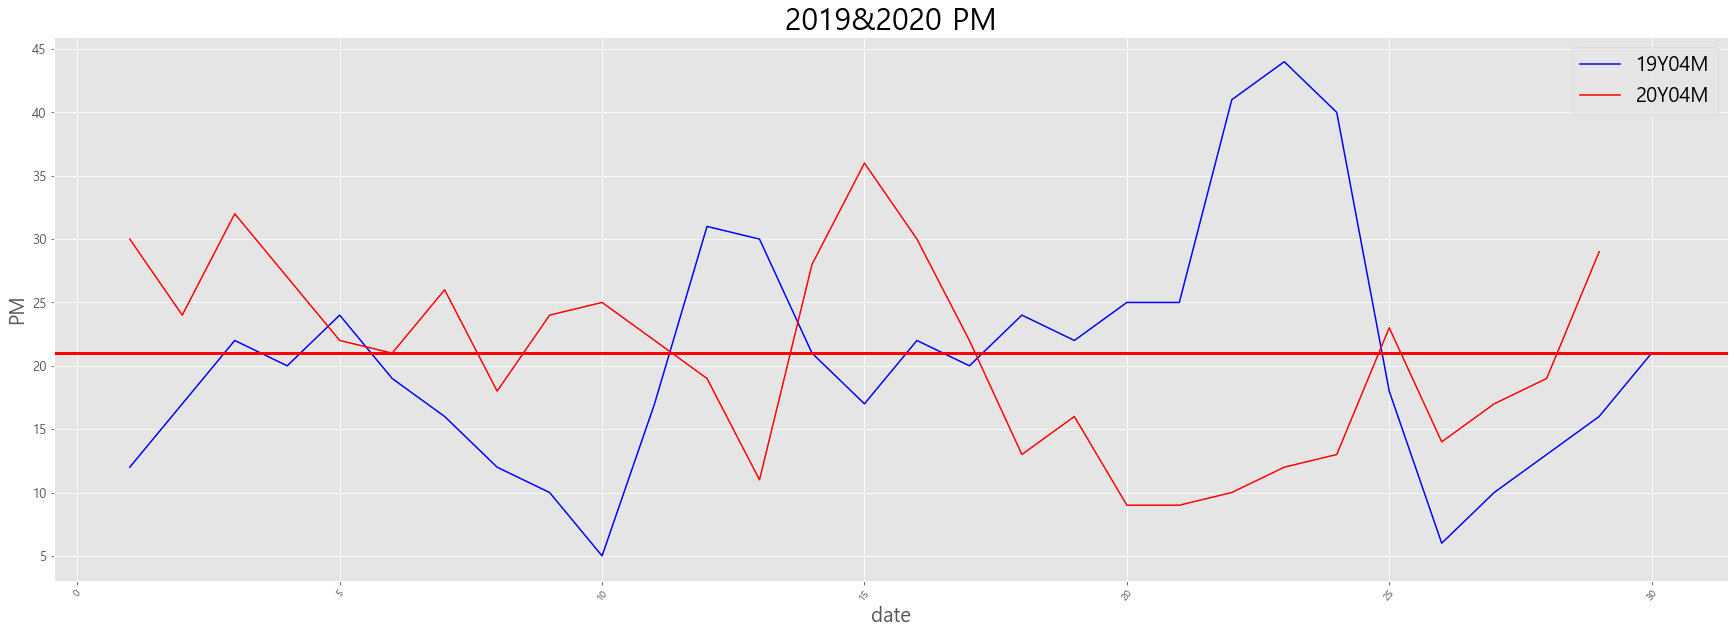

In [106]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1904'], color='blue')
plt.plot(df_PM['date'], df_PM['2004'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 21, color='blue', linewidth=3)
plt.axhline(y= 21, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y04M', '20Y04M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

# 4월은 동일

### 평균적으로 2019년 대비 미세먼지양의 차이가 확연함
### 사회적거리두기와 관계없이 미세먼지양이 줄어듬

### 추가적으로 중국 미세먼지 농도를 코로나 발생 전후로 진행해보고자 함